In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Mục lục theo***

**- print head**

**- shape**

**- describe**

**- nunique**

**- values_count**

**- tính isnull**

**- %.null**

**- histograme**

**- correlation**

**-distribution**

# I. Import thư viện

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#  Function
def phan_loai_fetures(data):
  cat_fetures = [col for col in data.columns if data[col].dtypes == 'object']
  num_fetures = [col for col in data.columns if data[col].dtypes != 'object']
  return cat_fetures, num_fetures
  
def percent_null(data):
  x = data.isnull().sum()
  count = len(data)
  x = pd.DataFrame(x, columns = ['number_null'])
  x['percent'] = round((x['number_null']/count)*100,2)
  return x

def descrip_series(df, series):
  a = df[series].value_counts()
  a = pd.DataFrame(data = a)
  a['percent_in_column'] = (a[series]/ df[series].count())*100
  return a
  
def replace_id_31(series):
  for i in series: 
    if i.str.contains("chorme", na = False): 
      series.replace(i, 'chorme')
    elif i.str.contains("safari", na = False): 
      series.replace(i, "safari")
    elif i.str.contain("fireford", na = False):
      series.replace(i, 'fireford')
  return series
   

def plot_fe(series, key, data): 
  plot = data[[series,'isFraud']][data.isFraud == key]
  plot = plot.groupby(by = plot.series,axis = 0).count()
  print(plot)
  return plt.bar(plot.index, plot['isFraud'])

  
def replace_distance(df,addr1,addr2,dist):
  df[addr2] = df[addr2].fillna("unknown")
  df[addr2] = df[addr2].replace({})
  return series
def percent_null(data):
  total = data.isnull().sum()
  count = len(data)
  percent = (total/count)*100
  percent = pd.DataFrame(percent,columns=['percent'])
  return percent

#  function Vân
def high_correlated_cols(dataframe, plot=True, corr_th=0.85):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        
        sns.set(rc={'figure.figsize': (25,25)})
        sns.heatmap(corr, cmap="RdBu_r", annot=True, fmt='.2f', square=True, linewidths=1,vmin = -1 , vmax = 1)
        plt.show()
    return drop_list


def ploting_cnt_amt(train_transaction, col, lim=2000):
    tmp = pd.crosstab(train_transaction[col], train_transaction['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    total = len(train_transaction)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=train_transaction, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    plt.show()


EDA: 
https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda


#II.TRAIN TRANSACTION

In [ ]:
# test_identity = pd.read_csv("https://raw.githubusercontent.com/hongnhungyknb1925/Essay/main/test_identity.csv", sep = ',')
# test_transaction = pd.read_csv("/content/test_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Essay /train_identity.csv")
#train_transaction = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Essay /train_transaction.csv")
train_transaction = pd.read_csv('/content/drive/MyDrive/Essay/train_transaction (3).csv')
train_identity = pd.read_csv('/content/drive/MyDrive/Essay/train_identity.csv')
# train_identity = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/essay/train_identity.csv")
# train_transaction = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/essay/train_transaction.csv")
df = pd.merge(train_transaction, train_identity, on = "TransactionID", how = "left")

## M1 - M9


In [ ]:
column_m = [col for col in train_transaction.columns if 'M' in col]
train_transaction[column_m].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_transaction[column_m].shape

(590540, 9)

In [ ]:
train_transaction[column_m].describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,2,2,2,3,2,2,2,2,2
top,T,T,T,M0,F,F,F,F,T
freq,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [ ]:
train_transaction[column_m].nunique()

M1    2
M2    2
M3    2
M4    3
M5    2
M6    2
M7    2
M8    2
M9    2
dtype: int64

In [ ]:
for i in column_m:
  print(train_transaction[i].value_counts())


T    319415
F        25
Name: M1, dtype: int64
T    285468
F     33972
Name: M2, dtype: int64
T    251731
F     67709
Name: M3, dtype: int64
M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64
F    132491
T    107567
Name: M5, dtype: int64
F    227856
T    193324
Name: M6, dtype: int64
F    211374
T     32901
Name: M7, dtype: int64
F    155251
T     89037
Name: M8, dtype: int64
T    205656
F     38632
Name: M9, dtype: int64


In [ ]:
train_transaction[column_m].isnull().sum()

M1    271100
M2    271100
M3    271100
M4    281444
M5    350482
M6    169360
M7    346265
M8    346252
M9    346252
dtype: int64

In [ ]:
n= percent_null(train_transaction[column_m])
n

,number_null,percent
M1,0,0.0
M2,0,0.0
M3,0,0.0
M4,0,0.0
M5,0,0.0
M6,0,0.0
M7,0,0.0
M8,0,0.0
M9,0,0.0


In [ ]:
train_transaction[column_m] = train_transaction[column_m].replace(np.nan,'unknown')

    isFraud
M1         
T      6342


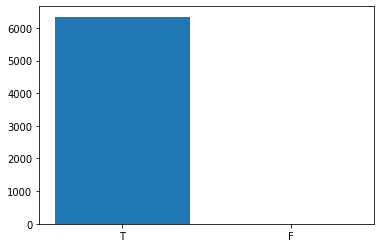

    isFraud
M1         
F        25
T    313073


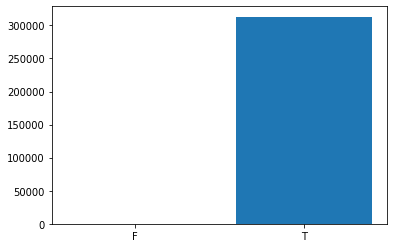

In [ ]:
# M1
yes = train_transaction[['M1','isFraud']][train_transaction.isFraud == 1]
yes = yes.groupby(by = yes.M1,axis = 0).count()
print(yes)
yes.loc['F'] = 0
plt.bar(yes.index, yes['isFraud'])
plt.show()

no = train_transaction[['M1','isFraud']][train_transaction.isFraud == 0]
no= no.groupby(by = no.M1,axis = 0).count()
print(no)
plt.bar(no.index, no['isFraud'])
plt.show()

    isFraud
M2         
F      1184
T      5158


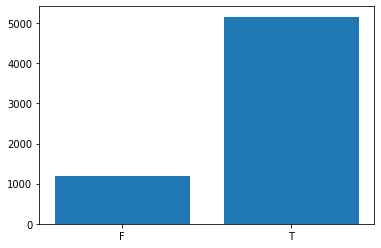

    isFraud
M2         
F     32788
T    280310


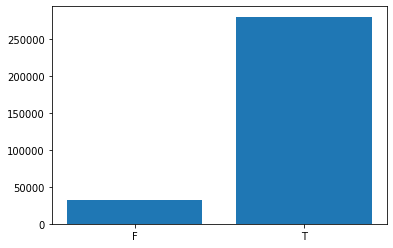

In [ ]:
# M2
yes = train_transaction[['M2','isFraud']][train_transaction.isFraud == 1]
yes = yes.groupby(by = yes.M2,axis = 0).count()
print(yes)
plt.bar(yes.index, yes['isFraud'])
plt.show()

no = train_transaction[['M2','isFraud']][train_transaction.isFraud == 0]
no= no.groupby(by = no.M2,axis = 0).count()
print(no)
plt.bar(no.index, no['isFraud'])
plt.show()

In [ ]:
train_transaction[column_m] = train_transaction[column_m].replace('unknown', np.nan)
train_transaction[column_m]=train_transaction[column_m].fillna(train_transaction[column_m].mode().iloc[0])
train_transaction[column_m]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,F,F,T
1,T,T,T,M0,T,T,F,F,T
2,T,T,T,M0,F,F,F,F,F
3,T,T,T,M0,T,F,F,F,T
4,T,T,T,M0,F,F,F,F,T
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,M0,F,T,F,F,T
590538,T,T,T,M0,F,T,F,F,T


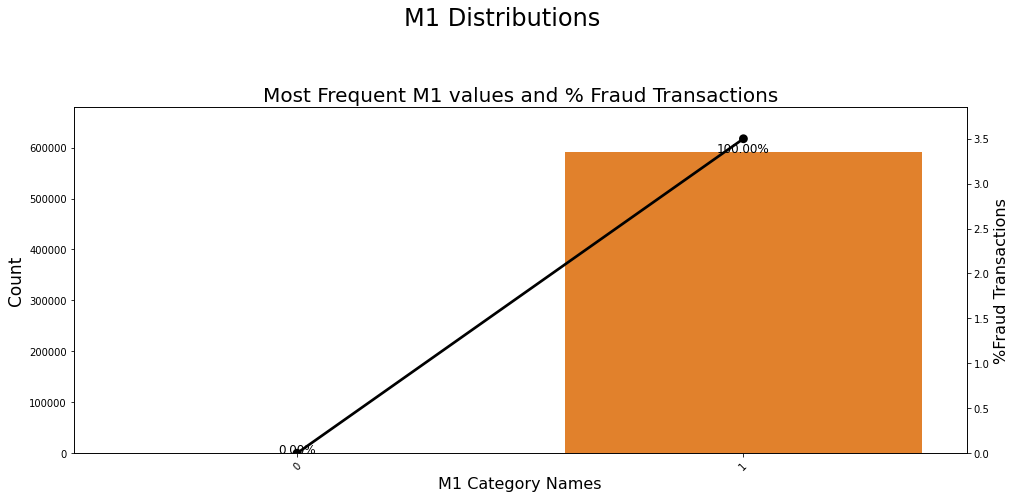

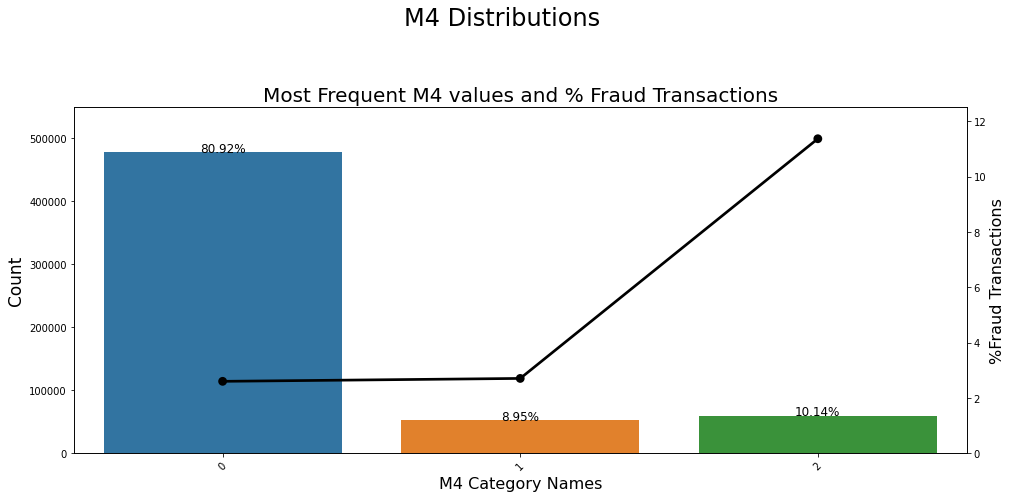

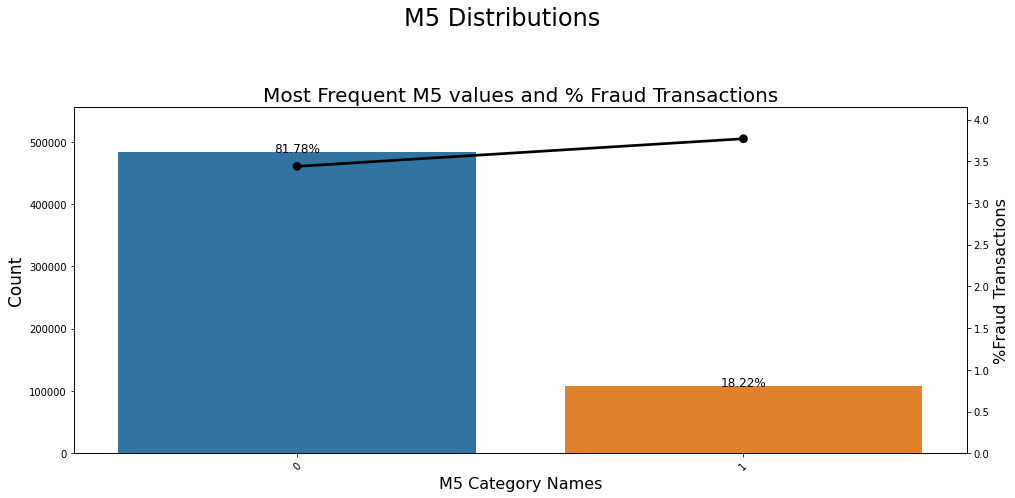

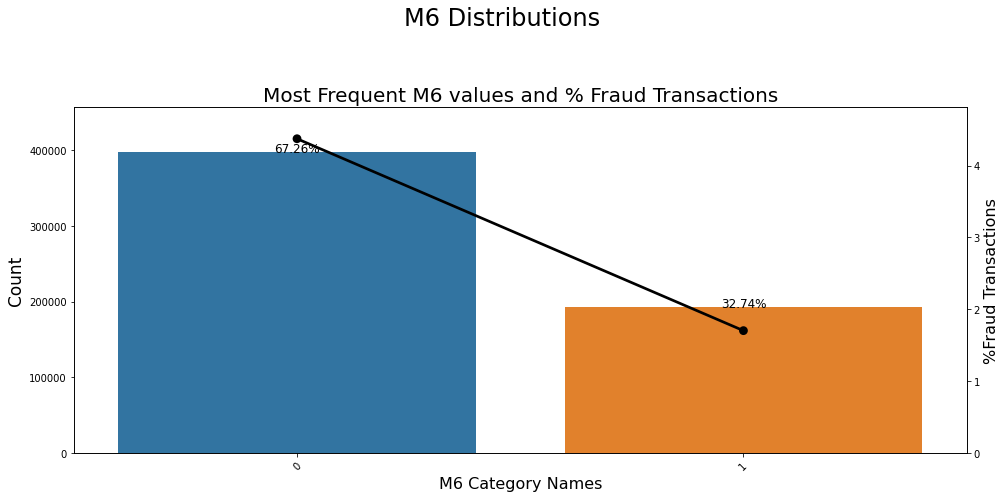

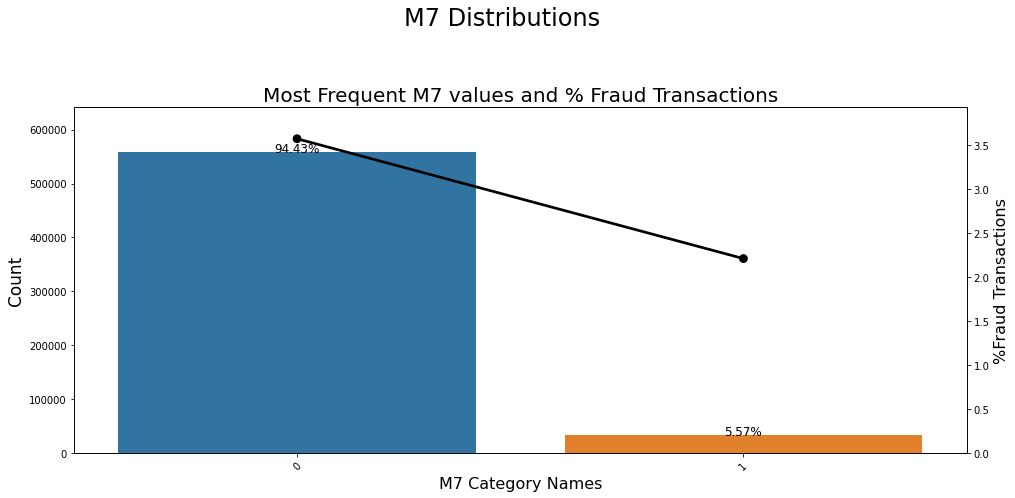

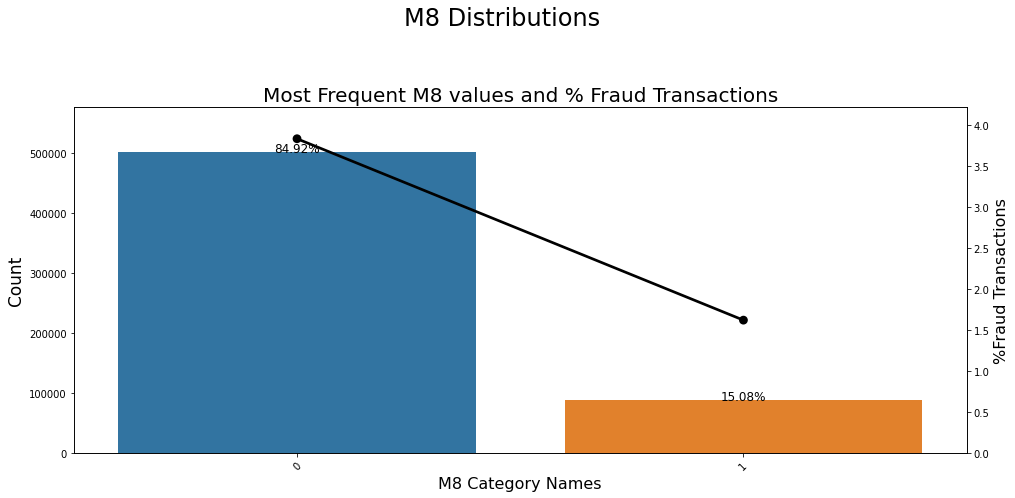

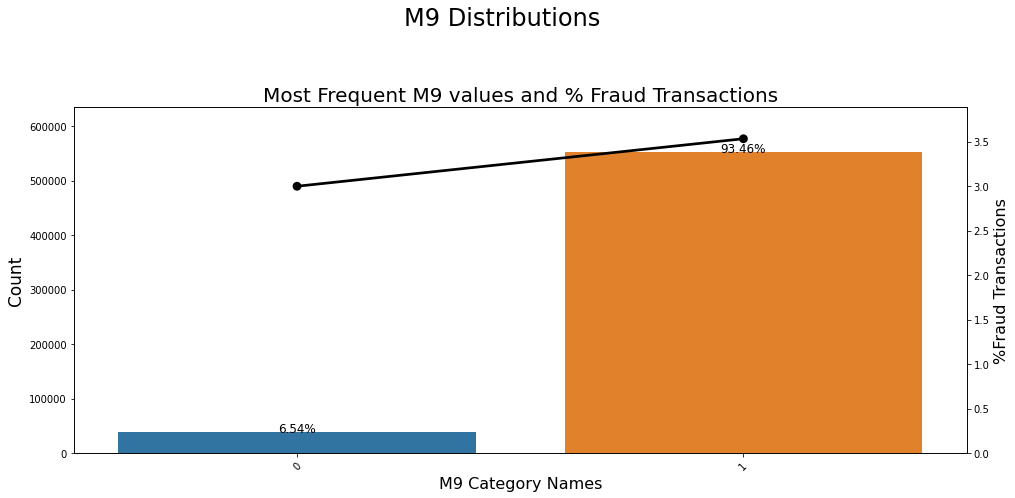

In [ ]:

for col in column_m:
    ploting_cnt_amt(train_transaction, col, lim=2500)

In [ ]:
x = column_m + ["isFraud"]
corr = train_transaction[x].corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,M1,M2,M3,M4,M5,M6,M7,M8,M9,isFraud
M1,1.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
M2,0.02,1.00,0.69,0.05,-0.04,-0.03,0.03,0.04,0.39,0.00
M3,0.02,0.69,1.00,0.08,-0.07,-0.07,-0.03,-0.06,0.26,0.01
M4,0.00,0.05,0.08,1.00,-0.03,-0.17,-0.06,-0.12,0.06,0.13
M5,0.00,-0.04,-0.07,-0.03,1.00,0.08,0.04,0.03,0.01,0.01
M6,0.00,-0.03,-0.07,-0.17,0.08,1.00,0.11,0.15,-0.01,-0.07
M7,0.00,0.03,-0.03,-0.06,0.04,0.11,1.00,0.55,0.06,-0.02
M8,0.00,0.04,-0.06,-0.12,0.03,0.15,0.55,1.00,0.11,-0.04
M9,0.00,0.39,0.26,0.06,0.01,-0.01,0.06,0.11,1.00,0.01
isFraud,0.00,0.00,0.01,0.13,0.01,-0.07,-0.02,-0.04,0.01,1.00


## Data về khoảng cách giao dịch: add1 , add2, dist1, dist2


In [ ]:
distance = ['addr1','addr2','dist1','dist2']
train_transaction[distance].head()

,addr1,addr2,dist1,dist2
0,315.0,87.0,19.0,NaN
1,325.0,87.0,NaN,NaN
2,330.0,87.0,287.0,NaN
3,476.0,87.0,NaN,NaN
4,420.0,87.0,NaN,NaN


In [ ]:
train_transaction[distance].shape

(590540, 4)

In [ ]:
train_transaction[distance].describe()

,addr1,addr2,dist1,dist2
count,524834.000000,524834.000000,238269.000000,37627.000000
mean,290.733794,86.800630,118.502180,231.855423
std,101.741072,2.690623,371.872026,529.053494
min,100.000000,10.000000,0.000000,0.000000
25%,204.000000,87.000000,3.000000,7.000000
50%,299.000000,87.000000,8.000000,37.000000
75%,330.000000,87.000000,24.000000,206.000000
max,540.000000,102.000000,10286.000000,11623.000000


In [ ]:
train_transaction[distance].nunique()

addr1     332
addr2      74
dist1    2651
dist2    1751
dtype: int64

In [ ]:
train_transaction['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [ ]:
train_transaction['addr2'].value_counts().head(10)

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64

In [ ]:
train_transaction['dist1'].value_counts().head(10)

0.0    19824
1.0    18330
2.0    17028
4.0    13067
3.0    12808
5.0    12004
6.0     9843
7.0     9340
8.0     7731
9.0     7728
Name: dist1, dtype: int64

In [ ]:
train_transaction['dist2'].value_counts().head(10)

7.0     5687
0.0     3519
1.0     1374
9.0      742
4.0      659
2.0      556
3.0      490
68.0     485
6.0      412
13.0     397
Name: dist2, dtype: int64

In [ ]:
percent_null(train_transaction[distance])


,number_null,percent
addr1,65706,11.13
addr2,65706,11.13
dist1,352271,59.65
dist2,552913,93.63


In [ ]:
train_transaction['addr2'].value_counts().head(10)

87.0      520481
NoInf      65706
60.0        3084
96.0         638
Others       403
32.0          91
65.0          82
16.0          55
Name: addr2, dtype: int64

In [ ]:
train_transaction[distance].isnull().sum()

addr1     65706
addr2     65706
dist1    352271
dist2    552913
dtype: int64

In [ ]:
percent_null(train_transaction[distance])

,number_null,percent
addr1,65706,11.13
addr2,65706,11.13
dist1,352271,59.65
dist2,552913,93.63


In [ ]:
a = descrip_series(train_transaction, 'addr1')
a

,addr1,percent_in_column
299.0,46335,8.828506
325.0,42751,8.145623
204.0,42020,8.006341
264.0,39870,7.596688
330.0,26287,5.008631
...,...,...
386.0,1,0.000191
101.0,1,0.000191
353.0,1,0.000191
516.0,1,0.000191


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


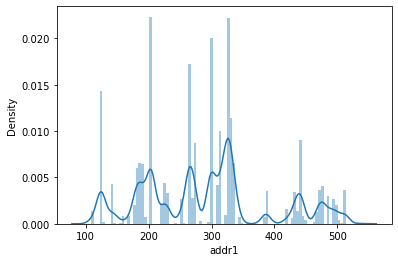

In [ ]:
sns.distplot(train_transaction['addr1'],bins = 100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


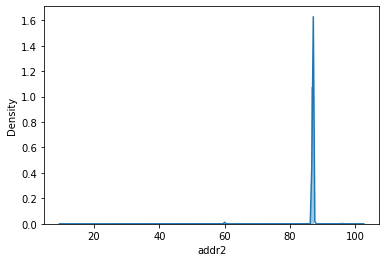

In [ ]:
sns.distplot(train_transaction['addr2'],bins = 100)

In [ ]:
train_transaction.loc[train_transaction['addr1'].isin(train_transaction['addr1'].value_counts()[train_transaction['addr1'].value_counts() <= 5000 ].index), 'addr1'] = "Others"
train_transaction.loc[train_transaction['addr2'].isin(train_transaction['addr2'].value_counts()[train_transaction['addr2'].value_counts() <= 50 ].index), 'addr2'] = "Others"
train_transaction['addr1'].fillna("NoInf", inplace=True)
train_transaction['addr2'].fillna("NoInf", inplace=True)


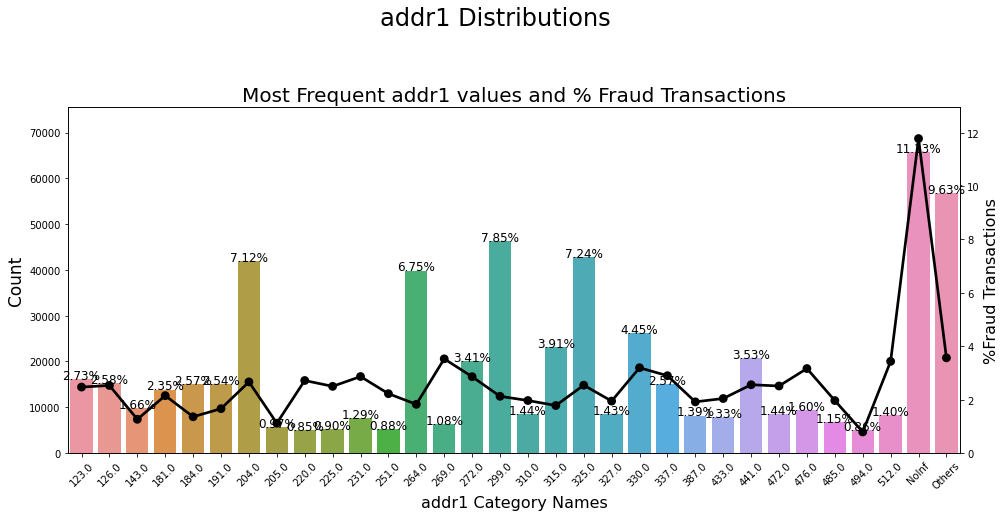

In [ ]:
ploting_cnt_amt(train_transaction, "addr1")

In [ ]:
b = descrip_series(train_transaction, 'addr2')
b
#  vì data chiếm 99.17% là data có chứa 87 - Hoa Kì 
# nên encoding 87 là Hoa Kỳ và 73 dòng còn lại là other countries.


,addr2,percent_in_column
87.0,520481,88.136451
NoInf,65706,11.126427
60.0,3084,0.522234
96.0,638,0.108037
Others,403,0.068243
32.0,91,0.015410
65.0,82,0.013886
16.0,55,0.009314


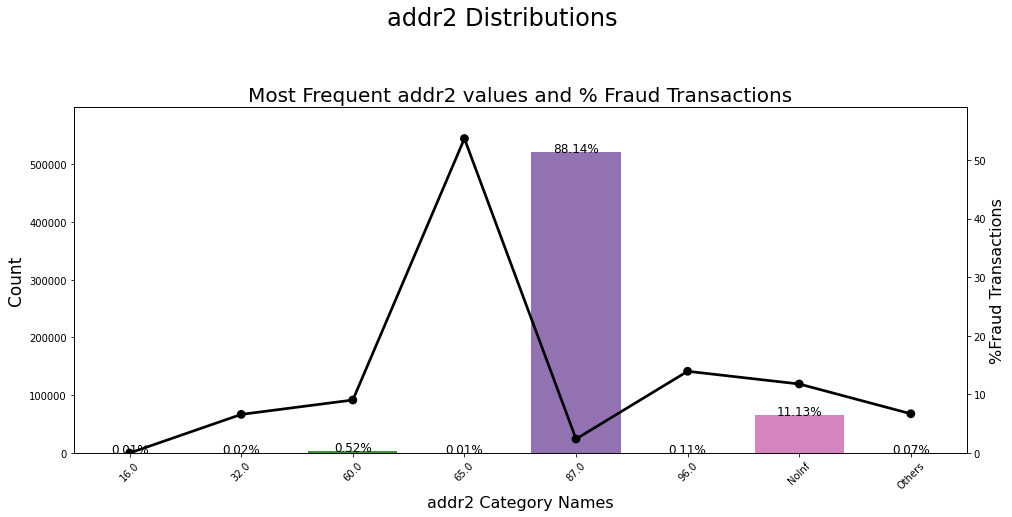

In [ ]:
ploting_cnt_amt(train_transaction, "addr2")

In [ ]:
y =distance+ ["isFraud"]
corr = train_transaction[y].corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,addr1,addr2,dist1,dist2,isFraud
addr1,1.00,-0.00,-0.00,0.00,0.01
addr2,-0.00,1.00,-0.04,0.01,-0.03
dist1,-0.00,-0.04,1.00,nan,0.02
dist2,0.00,0.01,nan,1.00,-0.02
isFraud,0.01,-0.03,0.02,-0.02,1.00


## P_emaildomain & R_emaildomain




1.  P_emaildomain


In [ ]:
train_transaction['P_emaildomain'].head()

0            NaN
1      gmail.com
2    outlook.com
3      yahoo.com
4      gmail.com
Name: P_emaildomain, dtype: object

In [ ]:
train_transaction['P_emaildomain'].shape

(590540,)

In [ ]:
train_transaction['P_emaildomain'].describe()

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

In [ ]:
train_transaction['P_emaildomain'].nunique()

59

In [ ]:
train_transaction['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

In [ ]:
train_transaction['P_emaildomain'].isnull().sum()

94456

In [ ]:
Pemail= train_transaction['P_emaildomain']

In [ ]:
train_transaction['P_emaildomain'].fillna('unknown',inplace=True)

In [ ]:
x_P = train_transaction[['P_emaildomain', 'isFraud']]
x_P.head()

,P_emaildomain,isFraud
0,unknown,0
1,gmail.com,0
2,outlook.com,0
3,yahoo.com,0
4,gmail.com,0


In [ ]:
y_P = isFraud_p_emaildomain = x_P[x_P['isFraud'] == 1]
y_P['P_emaildomain'].unique()

array(['aol.com', 'hotmail.com', 'outlook.com', 'gmail.com', 'yahoo.com',
       'unknown', 'anonymous.com', 'icloud.com', 'frontiernet.net',
       'me.com', 'ymail.com', 'att.net', 'sbcglobal.net', 'comcast.net',
       'live.com', 'mail.com', 'charter.net', 'gmail', 'msn.com',
       'cox.net', 'verizon.net', 'protonmail.com', 'bellsouth.net',
       'live.com.mx', 'cableone.net', 'yahoo.com.mx', 'optonline.net',
       'aim.com', 'prodigy.net.mx', 'outlook.es', 'hotmail.es',
       'suddenlink.net', 'earthlink.net', 'yahoo.fr', 'rocketmail.com',
       'roadrunner.com', 'embarqmail.com', 'yahoo.es', 'mac.com',
       'frontier.com', 'sc.rr.com', 'netzero.net', 'juno.com'],
      dtype=object)

In [ ]:
y_P['P_emaildomain'].value_counts()

gmail.com          9943
unknown            2790
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net              30
cox.net              29
me.com               27
charter.net          25
verizon.net          22
hotmail.es           20
optonline.net        17
yahoo.com.mx         16
mac.com              14
sbcglobal.net        12
earthlink.net        11
gmail                11
embarqmail.com        9
frontier.com          8
juno.com              6
frontiernet.net       5
yahoo.fr              5
suddenlink.net        4
roadrunner.com        3
cableone.net          3
rocketmail.com        2
yahoo.es              2
prodigy.net.mx        1
sc.rr.com       

In [ ]:
train_transaction.loc[train_transaction['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_transaction.loc[train_transaction['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train_transaction.loc[train_transaction['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction.P_emaildomain.isin(train_transaction.P_emaildomain\
                                         .value_counts()[train_transaction.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
train_transaction.P_emaildomain.fillna("NoInf", inplace=True)

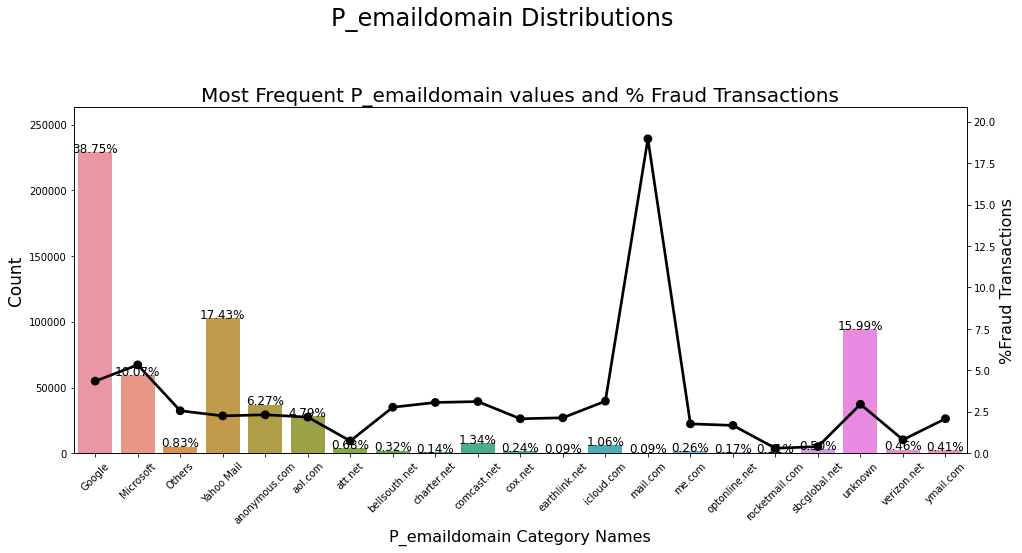

In [ ]:
ploting_cnt_amt(train_transaction, 'P_emaildomain')

2.   R_emaildomain


In [ ]:
train_transaction['R_emaildomain'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: R_emaildomain, dtype: object

In [ ]:
train_transaction['R_emaildomain'].describe()

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [ ]:
train_transaction['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [ ]:
train_transaction['R_emaildomain'].value_counts().head(10)

gmail.com        57147
hotmail.com      27509
anonymous.com    20529
yahoo.com        11842
aol.com           3701
outlook.com       2507
comcast.net       1812
yahoo.com.mx      1508
icloud.com        1398
msn.com            852
Name: R_emaildomain, dtype: int64

In [ ]:
train_transaction['R_emaildomain'].isnull().sum()

453249

In [ ]:
train_transaction['R_emaildomain'].fillna('unknown',inplace=True)

In [ ]:
x_R = train_transaction[['R_emaildomain', 'isFraud']]
x_R.head()

,R_emaildomain,isFraud
0,unknown,0
1,unknown,0
2,unknown,0
3,unknown,0
4,unknown,0


In [ ]:
train_transaction.loc[train_transaction['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_transaction.loc[train_transaction['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train_transaction.loc[train_transaction['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction['R_emaildomain'].isin(train_transaction.R_emaildomain\
                                         .value_counts()[train_transaction['R_emaildomain'].value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"
train_transaction['R_emaildomain'].fillna("NoInf", inplace=True)

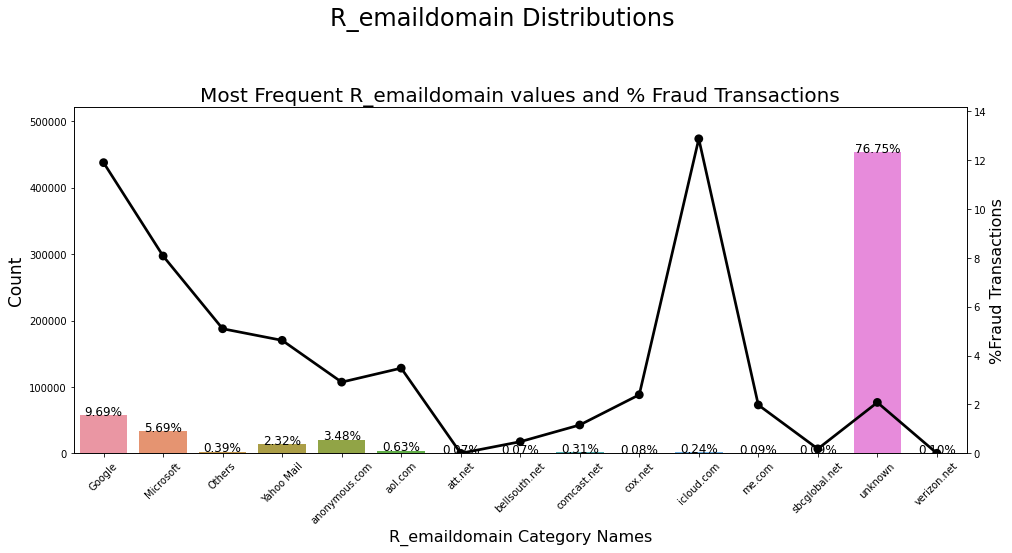

In [ ]:
ploting_cnt_amt(train_transaction, 'R_emaildomain')

In [ ]:
y_R = isFraud_r_emaildomain = x_R[x_R['isFraud'] == 1]
y_R['R_emaildomain'].unique()

array(['unknown', 'hotmail.com', 'outlook.com', 'gmail.com',
       'anonymous.com', 'yahoo.com', 'ymail.com', 'aol.com', 'icloud.com',
       'msn.com', 'cox.net', 'mail.com', 'protonmail.com', 'comcast.net',
       'live.com.mx', 'yahoo.com.mx', 'aim.com', 'prodigy.net.mx',
       'outlook.es', 'live.com', 'hotmail.es', 'sbcglobal.net',
       'optonline.net', 'me.com', 'earthlink.net', 'charter.net',
       'yahoo.fr', 'yahoo.es', 'suddenlink.net', 'netzero.net',
       'rocketmail.com', 'bellsouth.net', 'mac.com'], dtype=object)

In [ ]:
a_R = pd.DataFrame(y_R['R_emaildomain'].value_counts())
a_R['percent']= (a_R['R_emaildomain']/ a_R['R_emaildomain'].sum())*100

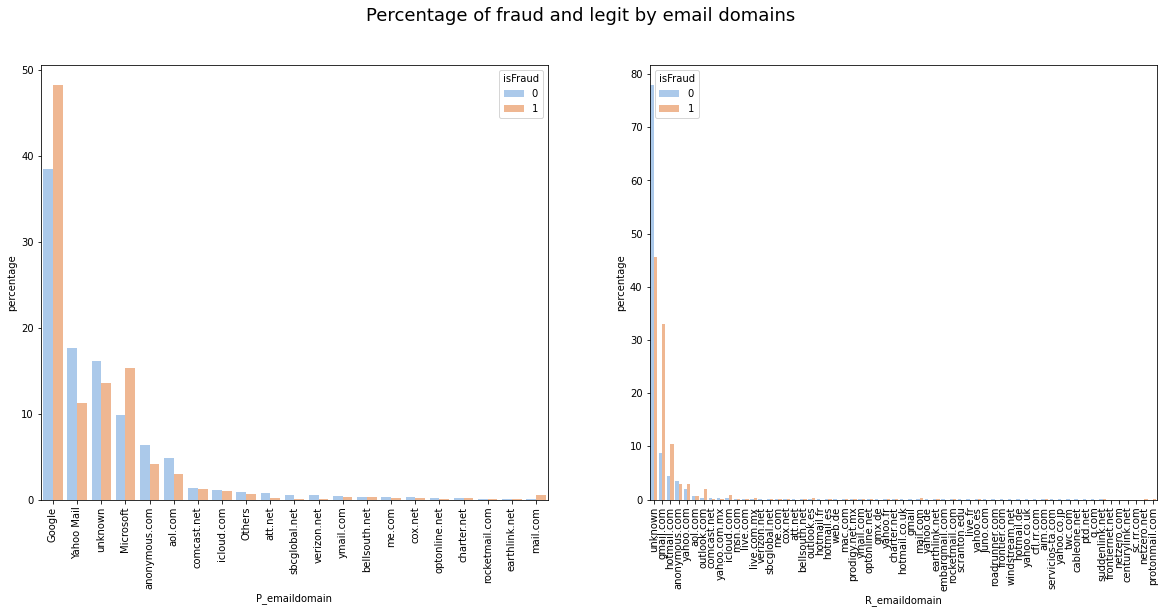

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train_transaction[~train_transaction['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train_transaction[~train_transaction['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

In [ ]:
train_transaction.loc[train_transaction['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
train_transaction.loc[train_transaction['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
train_transaction.loc[train_transaction['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction.P_emaildomain.isin(train_transaction.P_emaildomain.value_counts()[train_transaction.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
train_transaction.P_emaildomain.fillna("NoInf", inplace=True)

train_transaction.loc[train_transaction['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_transaction.loc[train_transaction['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo'
train_transaction.loc[train_transaction['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train_transaction.loc[train_transaction.R_emaildomain.isin(train_transaction.R_emaildomain.value_counts()[train_transaction.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"
train_transaction.R_emaildomain.fillna("NoInf", inplace=True)

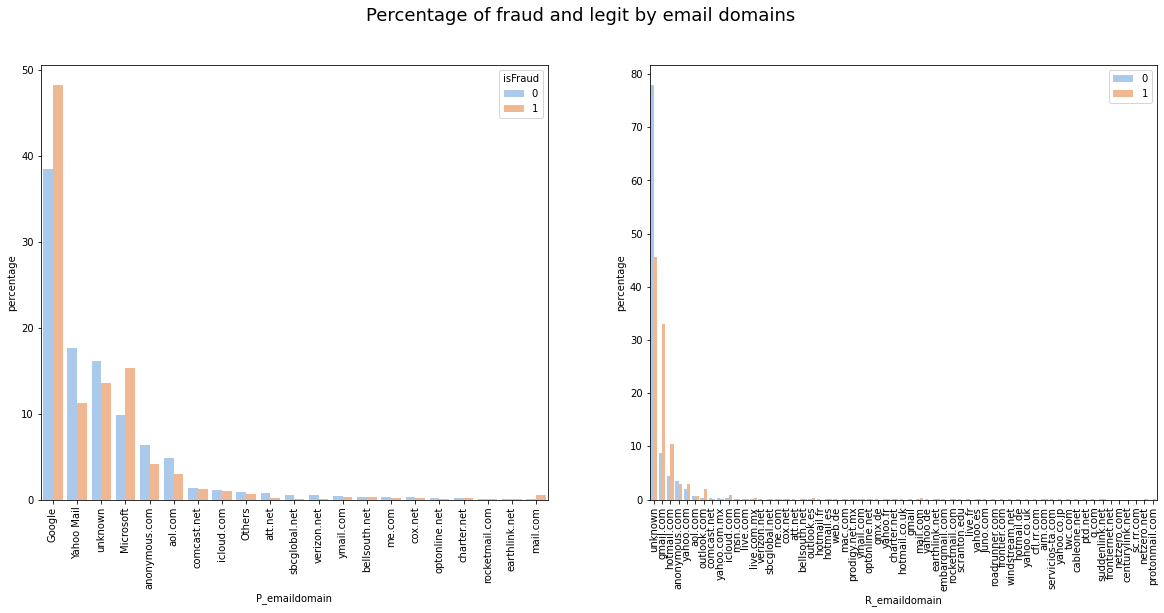

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train_transaction[~train_transaction['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train_transaction[~train_transaction['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

## C1-C14


In [ ]:
ccols = [f'C{i}' for i in range(1,15)]
train_transaction[ccols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
train_transaction[ccols].shape

(590540, 14)

In [ ]:
train_transaction[ccols].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [ ]:
train_transaction[ccols].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [ ]:
train_transaction[ccols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      590540 non-null  float64
 1   C2      590540 non-null  float64
 2   C3      590540 non-null  float64
 3   C4      590540 non-null  float64
 4   C5      590540 non-null  float64
 5   C6      590540 non-null  float64
 6   C7      590540 non-null  float64
 7   C8      590540 non-null  float64
 8   C9      590540 non-null  float64
 9   C10     590540 non-null  float64
 10  C11     590540 non-null  float64
 11  C12     590540 non-null  float64
 12  C13     590540 non-null  float64
 13  C14     590540 non-null  float64
dtypes: float64(14)
memory usage: 63.1 MB


In [ ]:
train_transaction[ccols].isnull().sum()

C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
dtype: int64

In [ ]:
n2= percent_null(train_transaction[ccols])
n2

,number_null,percent
C1,0,0.0
C2,0,0.0
C3,0,0.0
C4,0,0.0
C5,0,0.0
C6,0,0.0
C7,0,0.0
C8,0,0.0
C9,0,0.0
C10,0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


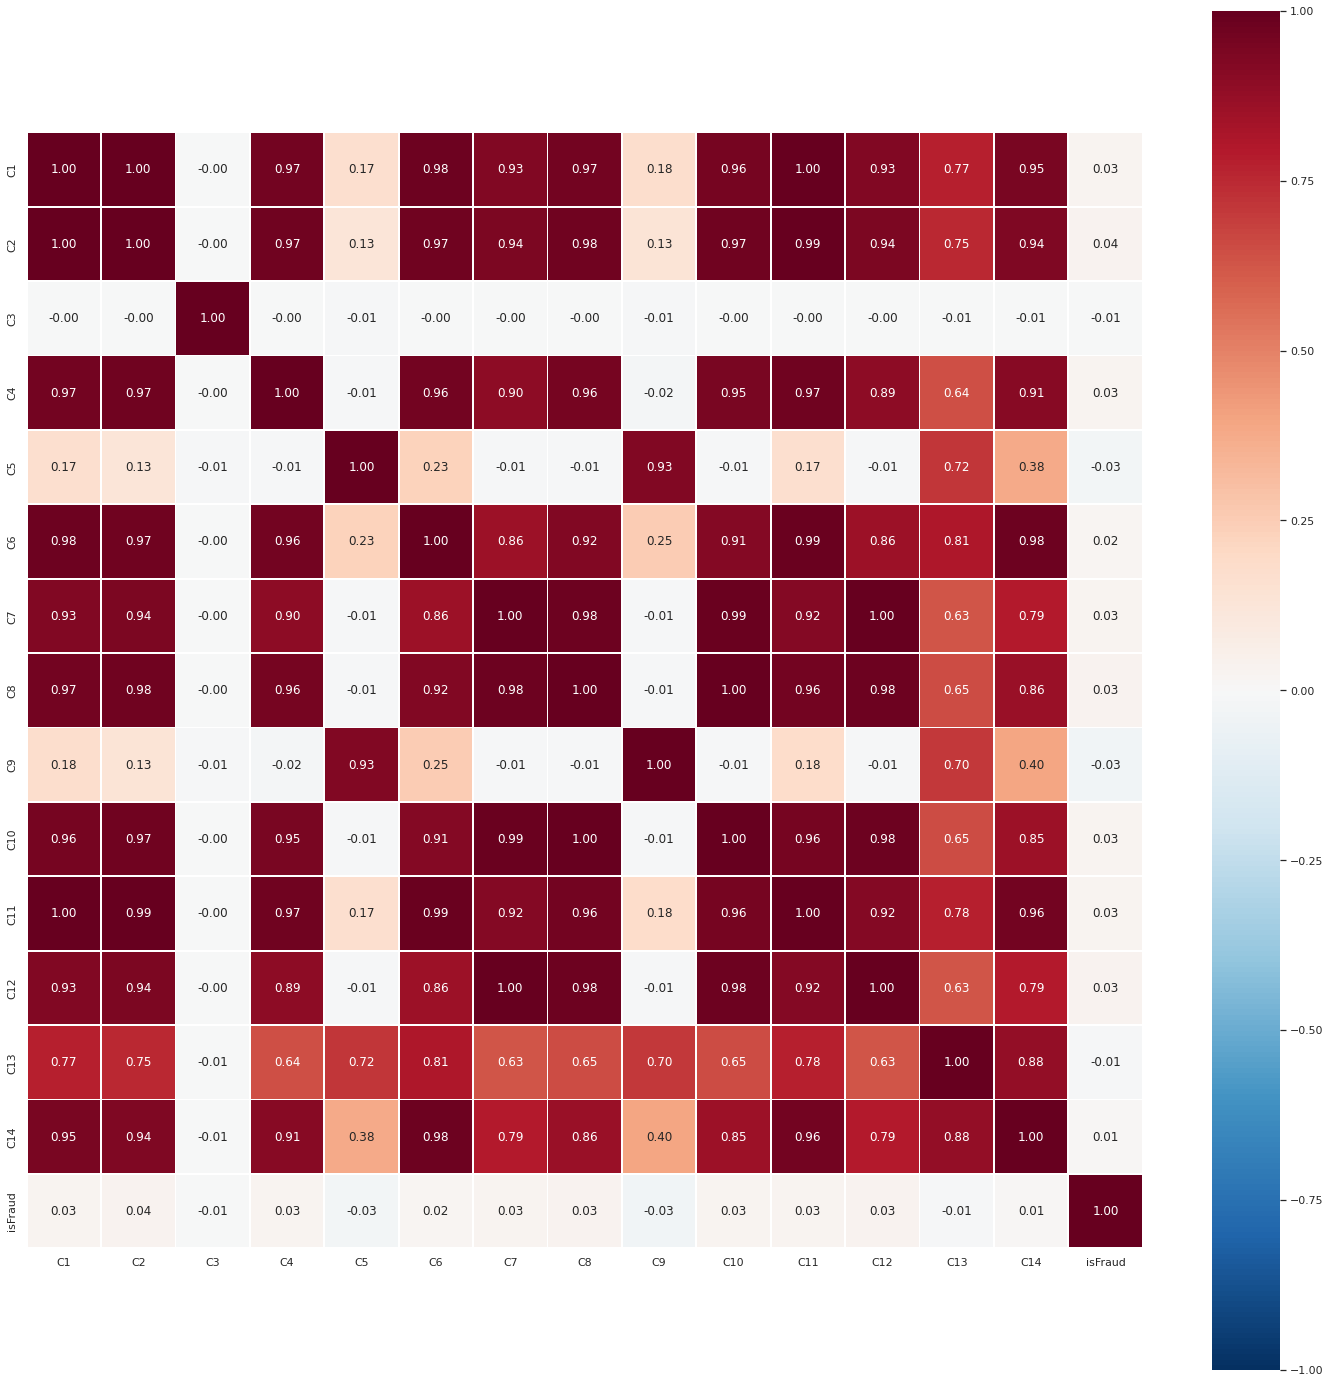

In [ ]:
ccols = [col for col in df.columns if col[0] == 'C']
ccols = ccols + ["isFraud"]
high_correlated_cols(train_transaction[ccols], plot=True)
drop_list_d = high_correlated_cols(train_transaction[ccols], plot=False)

In [ ]:
drop_list_c

['C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14']

##Card 1-6



###Card 4 - Categorical - credit card company

In [ ]:
train_transaction['card4'].head()

0      discover
1    mastercard
2          visa
3    mastercard
4    mastercard
Name: card4, dtype: object

In [ ]:
train_transaction['card4'].shape

(590540,)

In [ ]:
train_transaction['card4'].describe()

count     588963
unique         4
top         visa
freq      384767
Name: card4, dtype: object

In [ ]:
train_transaction['card4'].nunique()

4

In [ ]:
train_transaction['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [ ]:
missing_values_count_card4 = train_transaction['card4'].isnull().sum()
missing_values_count_card4

1577

In [ ]:
total_cells_card4 = np.product(train_transaction['card4'].shape)
total_missing_card4  = missing_values_count_card4.sum()
# percent of data that is missing
(total_missing_card4/total_cells_card4) * 100

0.267043722694483

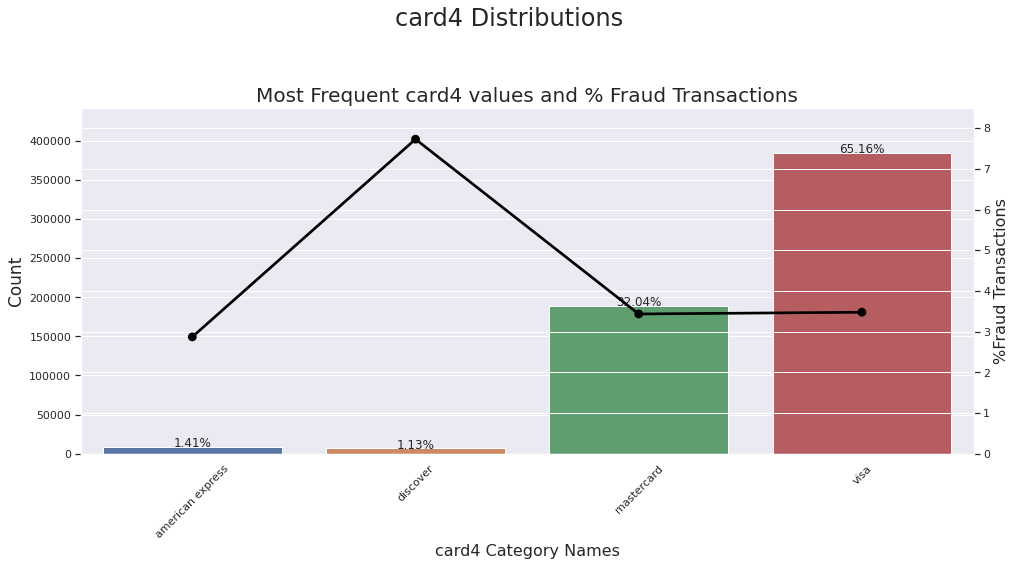

In [ ]:
ploting_cnt_amt(train_transaction, 'card4')

In [ ]:
# 97% of our data are in Mastercard(32%) and Visa(65%);

Text(0, 0.5, 'Count')

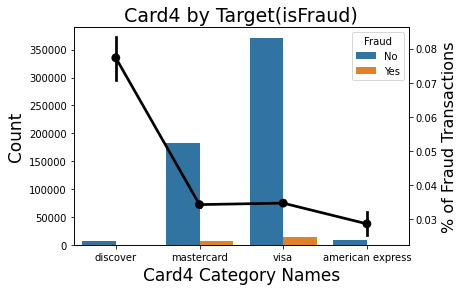

In [ ]:
g1 = sns.countplot(x='card4', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card4', y='isFraud',data=train_transaction, color='black')
#                   color='black', legend=False, data=tmp,
 #                  order=['discover', 'mastercard', 'visa', 'american express'])
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card4 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card4 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

In [ ]:
#we have a highest value in discover(~8%) against ~3.5% of Mastercard and Visa and ~2.8% in American Express

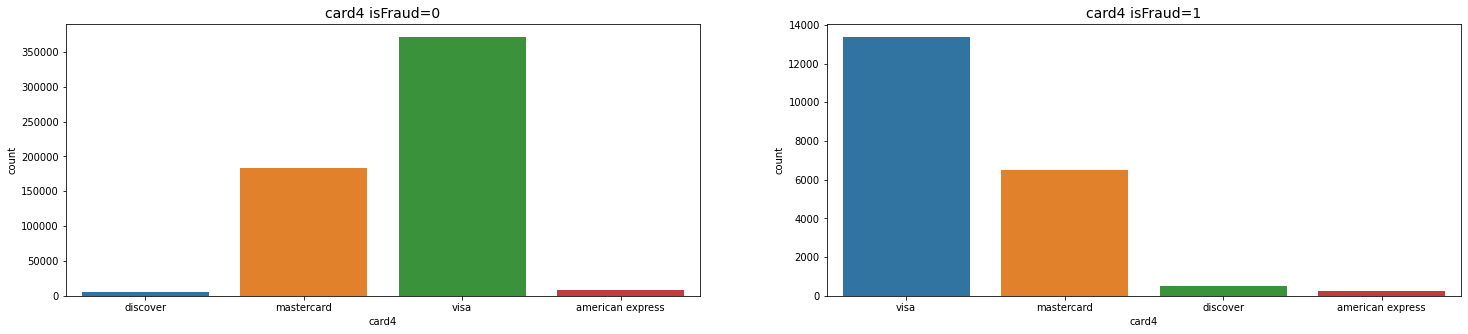

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=train_transaction.loc[train_transaction['isFraud'] == 0])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=train_transaction.loc[train_transaction['isFraud'] == 1])
ax[1].set_title('card4 isFraud=1', fontsize=14) 
plt.show()

###card6 -categorical -  type of card

In [ ]:
train_transaction['card6'].head()

0    credit
1    credit
2     debit
3     debit
4    credit
Name: card6, dtype: object

In [ ]:
train_transaction['card6'].shape

(590540,)

In [ ]:
train_transaction['card6'].describe()

count     588969
unique         4
top        debit
freq      439938
Name: card6, dtype: object

In [ ]:
train_transaction['card6'].nunique()

4

In [ ]:
train_transaction['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [ ]:
missing_values_count_card6 = train_transaction['card6'].isnull().sum()
missing_values_count_card6

1571

In [ ]:
total_cells_card6 = np.product(train_transaction['card6'].shape)
total_missing_card6  = missing_values_count_card6.sum()
# percent of data that is missing
(total_missing_card6/total_cells_card6) * 100

0.26602770345785215

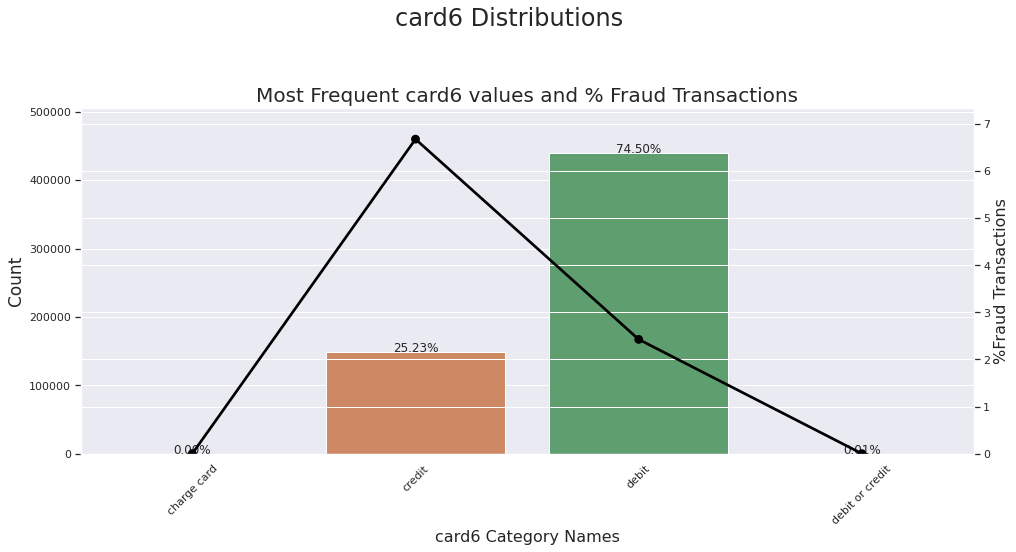

In [ ]:
ploting_cnt_amt(train_transaction, 'card6')

Text(0, 0.5, 'Count')

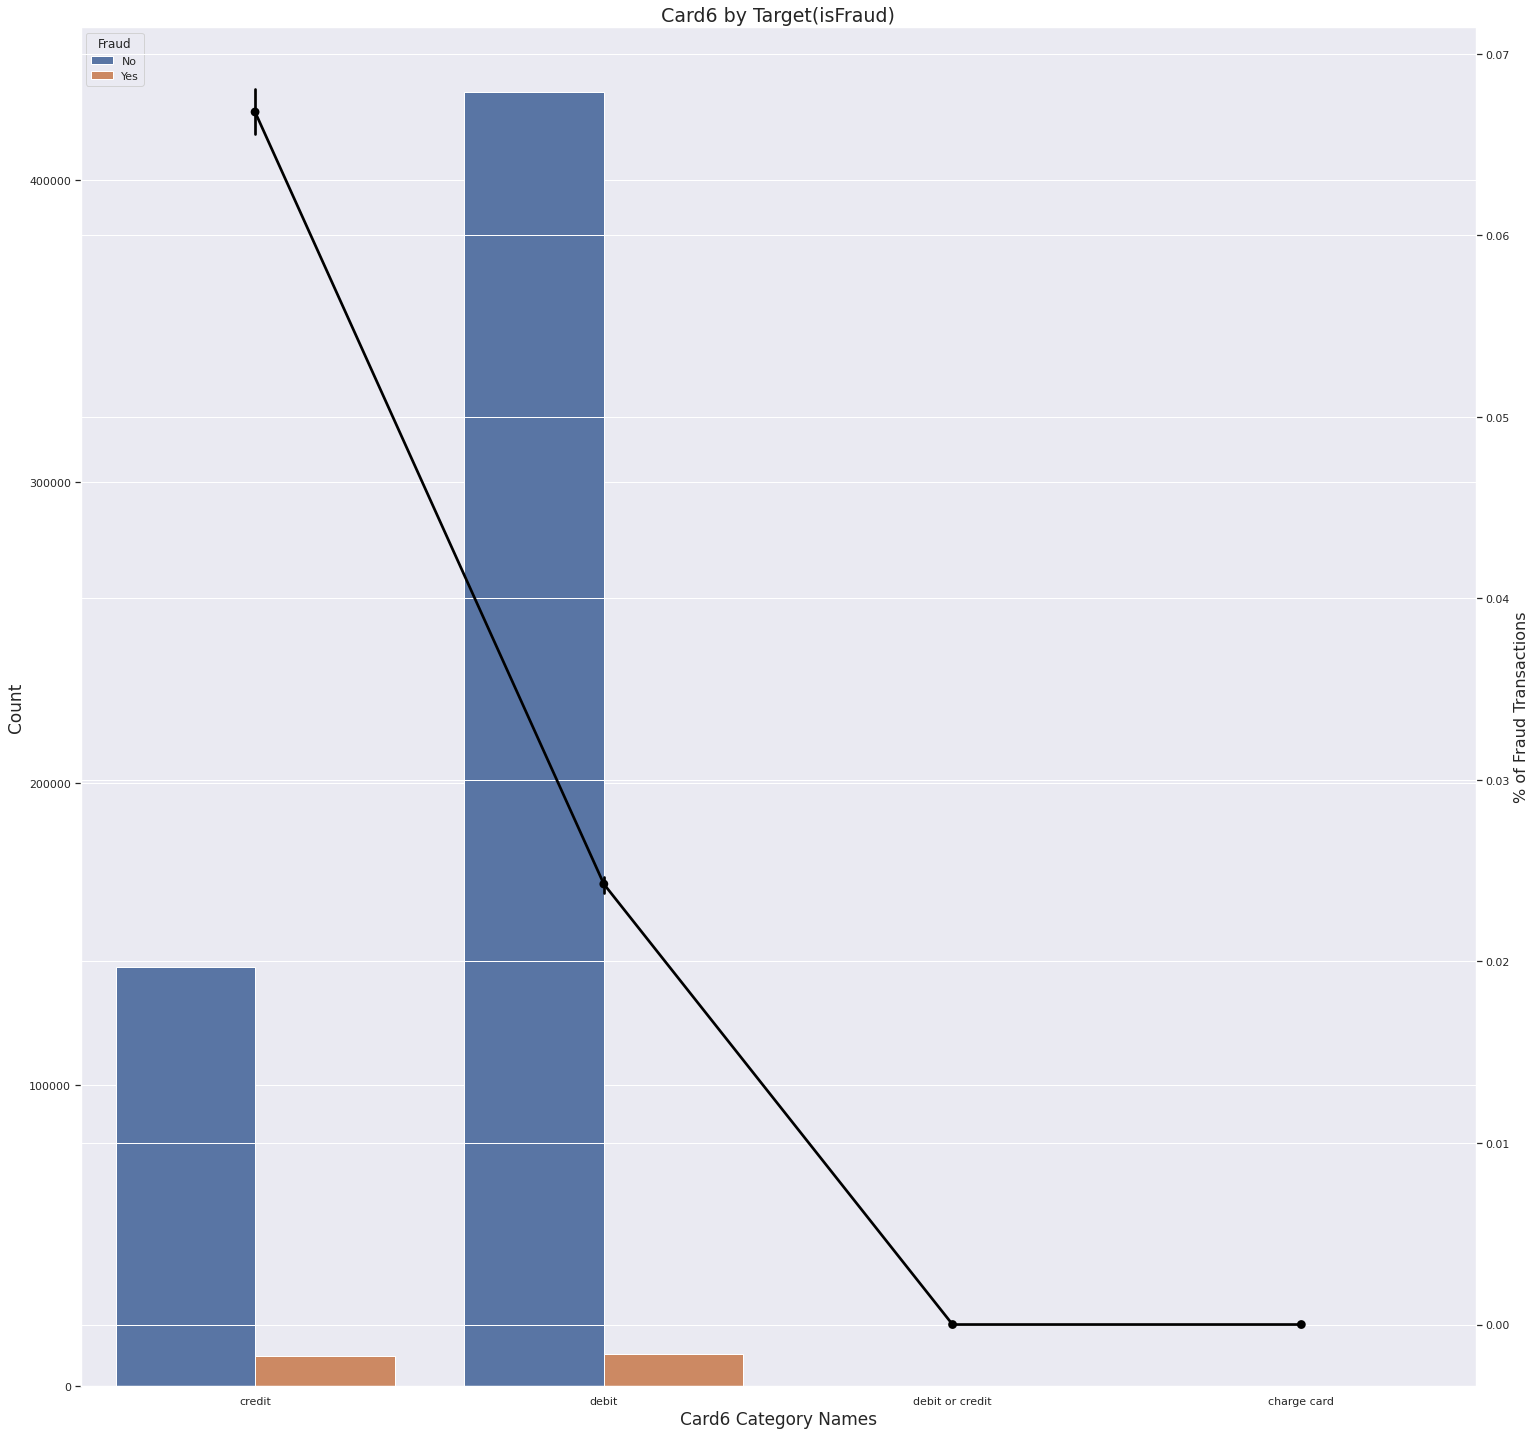

In [ ]:
g1 = sns.countplot(x='card6', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card6', y='isFraud',data=train_transaction, color='black')
#                   color='black', legend=False, data=tmp,
 #                  order=['discover', 'mastercard', 'visa', 'american express'])
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card6 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card6 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

###Numericals Feature Card: card 1,2,3,5

In [ ]:
print("Card Features Quantiles: ")
print(train_transaction[['card1', 'card2', 'card3', 'card5']].quantile([0.00, .25, .5, .75, 1.00]))

Card Features Quantiles: 
        card1  card2  card3  card5
0.00   1000.0  100.0  100.0  100.0
0.25   6019.0  214.0  150.0  166.0
0.50   9678.0  361.0  150.0  226.0
0.75  14184.0  512.0  150.0  226.0
1.00  18396.0  600.0  231.0  237.0


In [ ]:
#We can see that Card 1 and Card 2 has a large distribution of values

In [ ]:
train_transaction['card3'].head()

0    150.0
1    150.0
2    150.0
3    150.0
4    150.0
Name: card3, dtype: float64

In [ ]:
train_transaction['card3'].shape

(590540,)

In [ ]:
train_transaction['card3'].describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

In [ ]:
train_transaction['card3'].nunique()

114

In [ ]:
train_transaction['card3'].value_counts()

150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: card3, Length: 114, dtype: int64

In [ ]:
missing_values_count_card3 = train_transaction['card3'].isnull().sum()
missing_values_count_card3

1565

In [ ]:
card3_freq = (train_transaction['card3'].value_counts())/train_transaction.shape[0]
card3_freq

150.0    0.882729
185.0    0.095414
106.0    0.002660
144.0    0.002120
146.0    0.002120
           ...   
224.0    0.000002
199.0    0.000002
221.0    0.000002
209.0    0.000002
173.0    0.000002
Name: card3, Length: 114, dtype: float64

In [ ]:
train_transaction.loc[train_transaction.card3.isin(train_transaction.card3.value_counts()[train_transaction.card3.value_counts() < 200].index), 'card3'] = "Others"
train_transaction.loc[train_transaction.card5.isin(train_transaction.card5.value_counts()[train_transaction.card5.value_counts() < 300].index), 'card5'] = "Others"

In [ ]:
total = len(train_transaction)

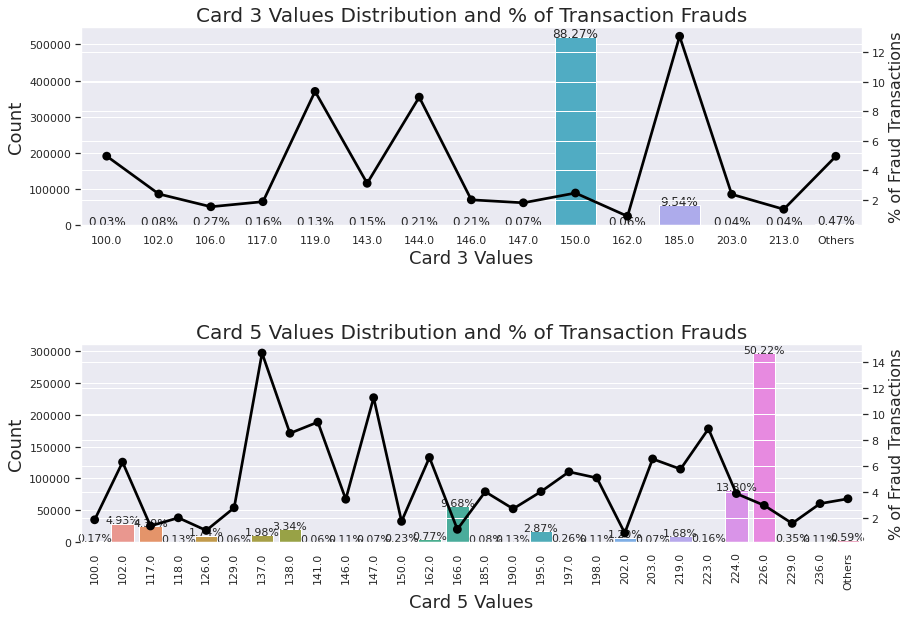

In [ ]:
tmp = pd.crosstab(train_transaction['card3'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

tmp2 = pd.crosstab(train_transaction['card5'], train_transaction['isFraud'], normalize='index') * 100
tmp2 = tmp2.reset_index()
tmp2.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,22))
plt.subplot(413)
g2 = sns.countplot(x='card3', data=train_transaction, order=list(tmp.card3.values))
g22 = g2.twinx()
gg2 = sns.pointplot(x='card3', y='Fraud', data=tmp, 
                    color='black', order=list(tmp.card3.values))
gg2.set_ylabel("% of Fraud Transactions", fontsize=16)
g2.set_title("Card 3 Values Distribution and % of Transaction Frauds", fontsize=20)
g2.set_xlabel("Card 3 Values", fontsize=18)
g2.set_ylabel("Count", fontsize=18)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
plt.subplot(414)
g3 = sns.countplot(x='card5', data=train_transaction, order=list(tmp2.card5.values))
g3t = g3.twinx()
g3t = sns.pointplot(x='card5', y='Fraud', data=tmp2, 
                    color='black', order=list(tmp2.card5.values))
g3t.set_ylabel("% of Fraud Transactions", fontsize=16)
g3.set_title("Card 5 Values Distribution and % of Transaction Frauds", fontsize=20)
g3.set_xticklabels(g3.get_xticklabels(),rotation=90)
g3.set_xlabel("Card 5 Values", fontsize=18)
g3.set_ylabel("Count", fontsize=18)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## D1-D15

In [ ]:
d_cols = [c for c in train_transaction if c[0] == 'D']
train_transaction[d_cols].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_transaction[d_cols].shape

(590540, 15)

In [ ]:
train_transaction[d_cols].nunique()

D1       641
D2       641
D3       649
D4       808
D5       688
D6       829
D7       597
D8     12353
D9        24
D10      818
D11      676
D12      635
D13      577
D14      802
D15      859
dtype: int64

In [ ]:
train_transaction[d_cols].describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000
mean,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579
std,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000


In [ ]:
train_transaction[d_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   D1      589271 non-null  float64
 1   D2      309743 non-null  float64
 2   D3      327662 non-null  float64
 3   D4      421618 non-null  float64
 4   D5      280699 non-null  float64
 5   D6      73187 non-null   float64
 6   D7      38917 non-null   float64
 7   D8      74926 non-null   float64
 8   D9      74926 non-null   float64
 9   D10     514518 non-null  float64
 10  D11     311253 non-null  float64
 11  D12     64717 non-null   float64
 12  D13     61952 non-null   float64
 13  D14     62187 non-null   float64
 14  D15     501427 non-null  float64
dtypes: float64(15)
memory usage: 67.6 MB


In [ ]:
train_transaction[d_cols].isnull().sum()
percent_null(train_transaction[d_cols])

,number_null,percent
D1,1269,0.21
D2,280797,47.55
D3,262878,44.51
D4,168922,28.60
D5,309841,52.47
D6,517353,87.61
D7,551623,93.41
D8,515614,87.31
D9,515614,87.31
D10,76022,12.87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


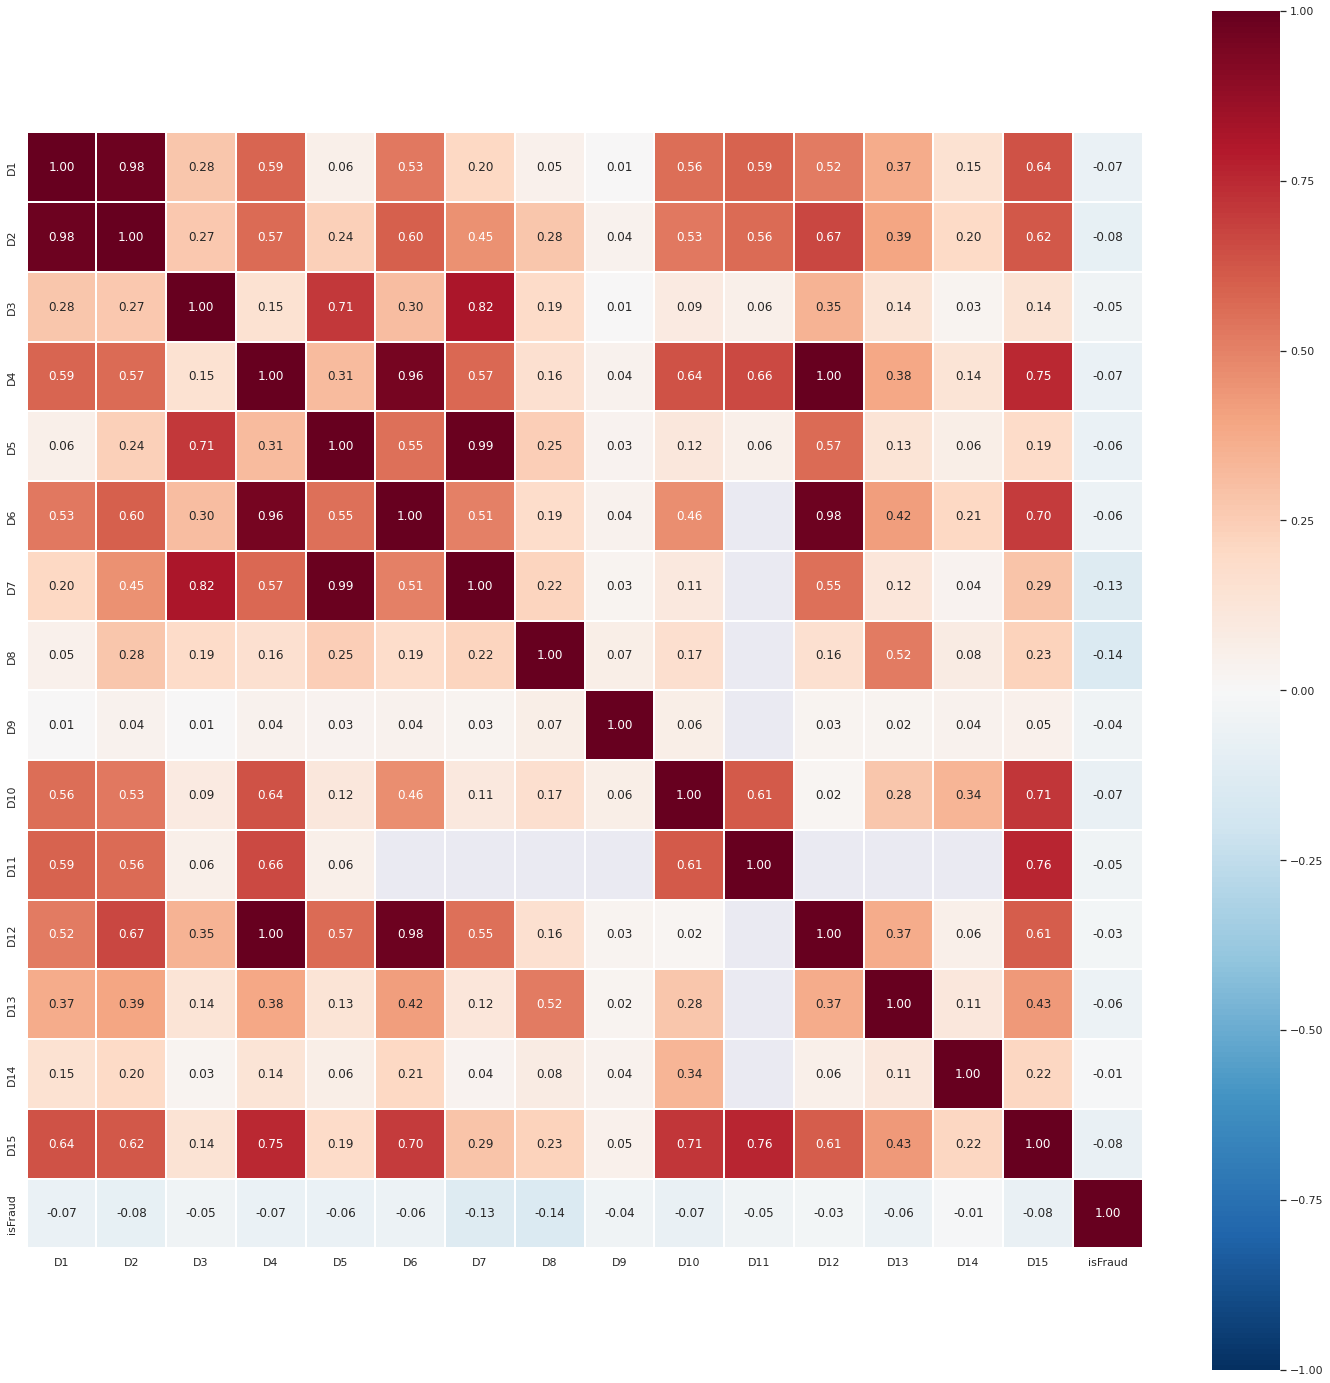

In [ ]:
d_cols = [col for col in train_transaction.columns if col[0] == 'D']
d_cols = d_cols + ["isFraud"]
high_correlated_cols(train_transaction[d_cols], plot=True)
drop_list_d = high_correlated_cols(train_transaction[d_cols], plot=False)

In [ ]:
drop_list_d

['D2', 'D6', 'D7', 'D12']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of columns D')

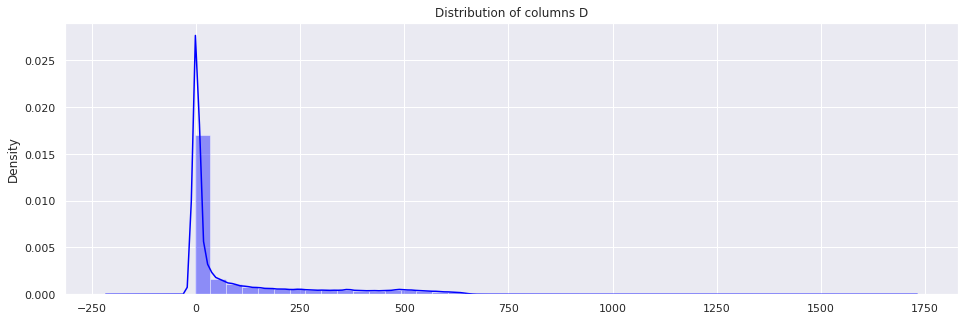

In [ ]:
f,axes  = plt.subplots(1,1, figsize=(16,5))
g1= sns.distplot(df[d_cols],color="blue", ax=axes)
plt.title("Distribution of columns D")

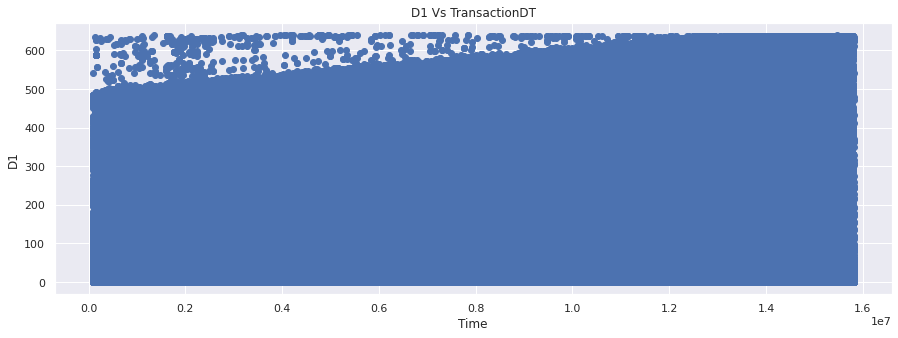

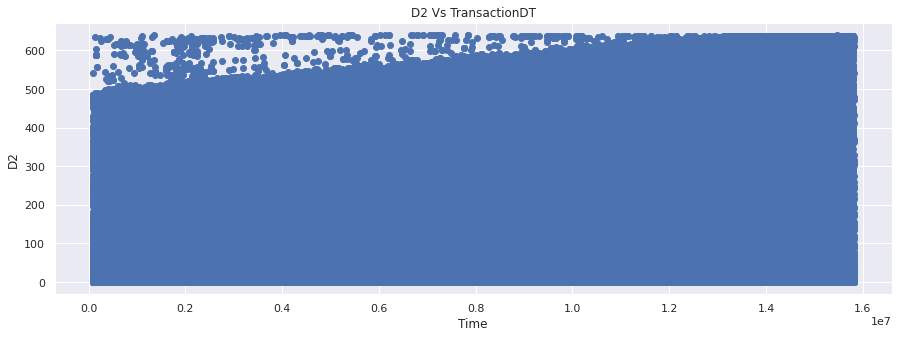

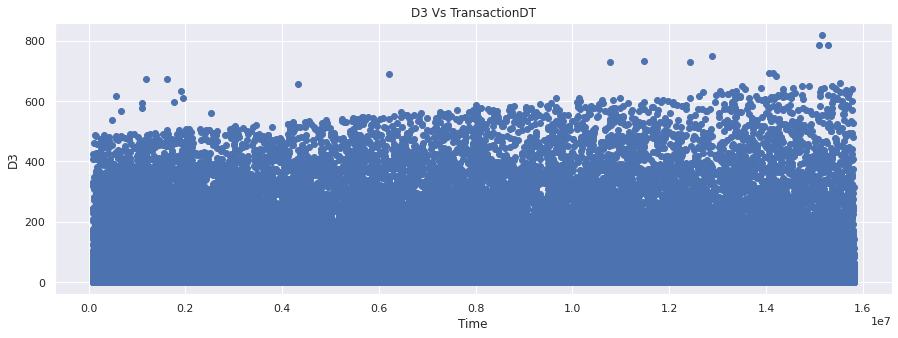

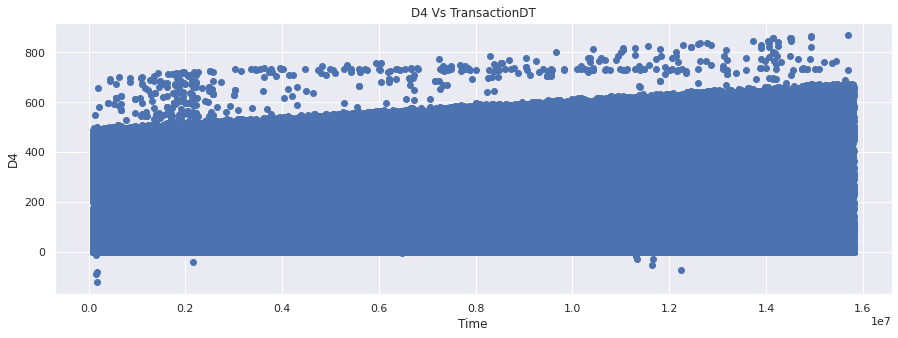

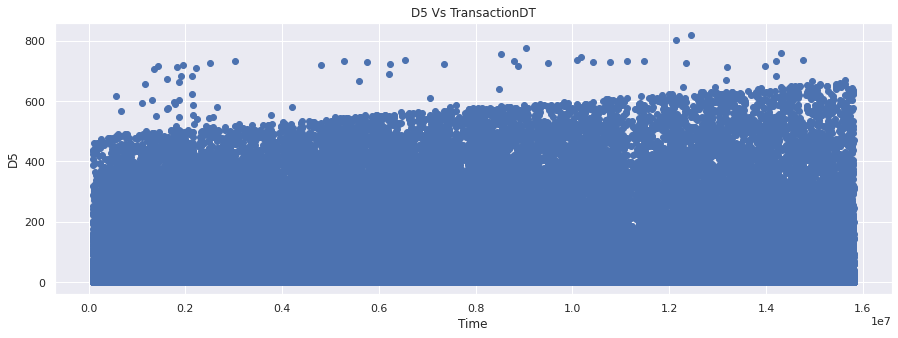

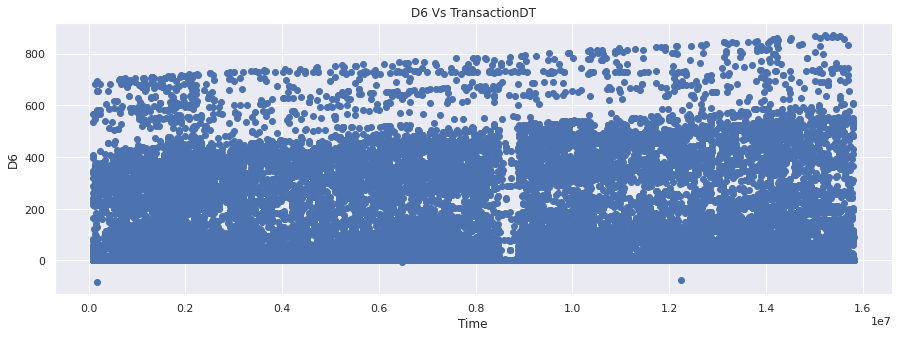

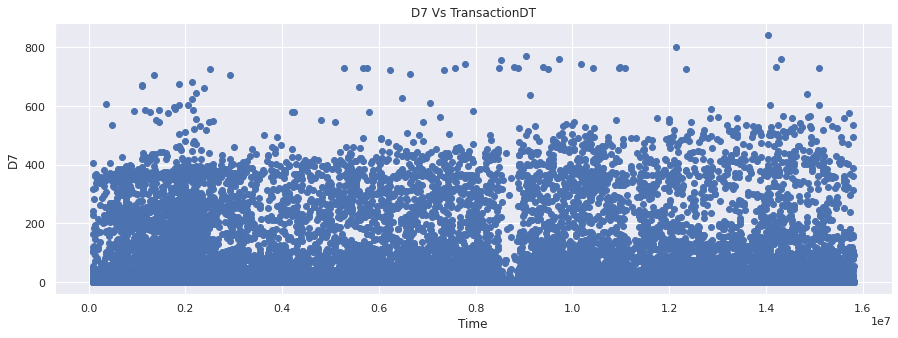

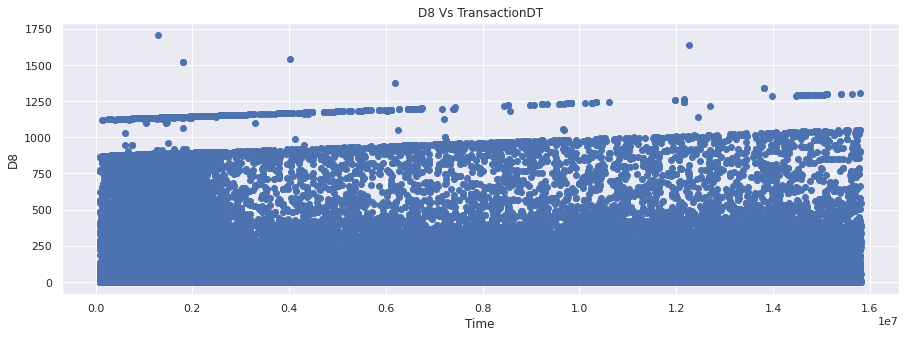

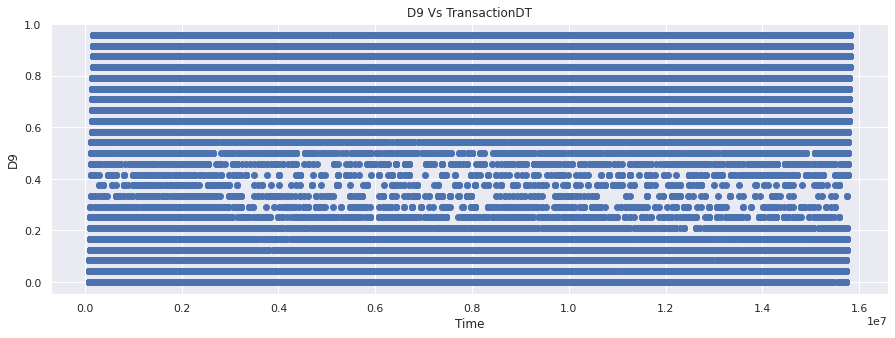

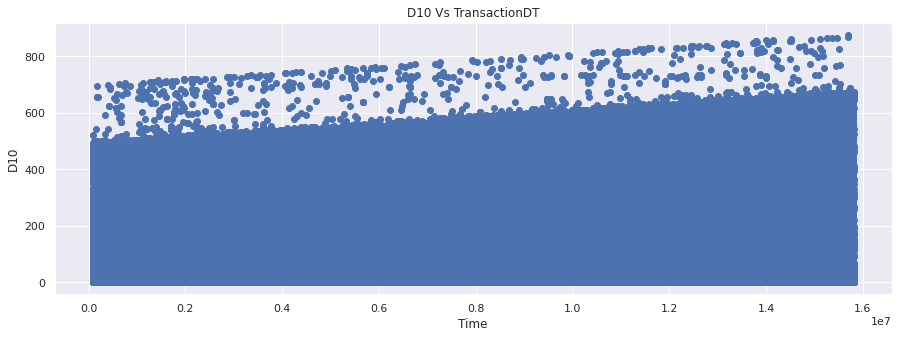

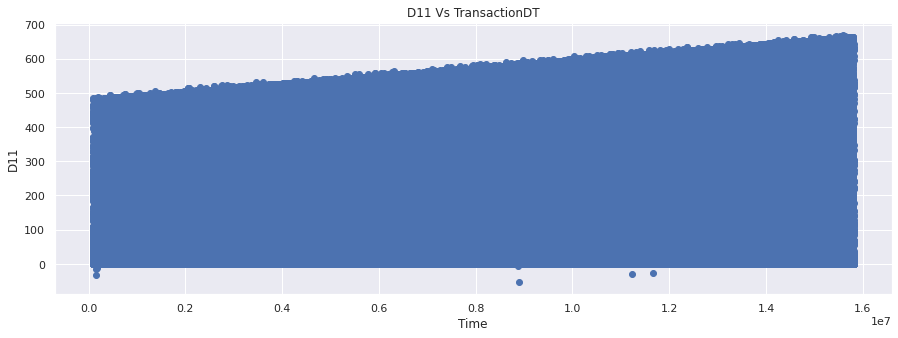

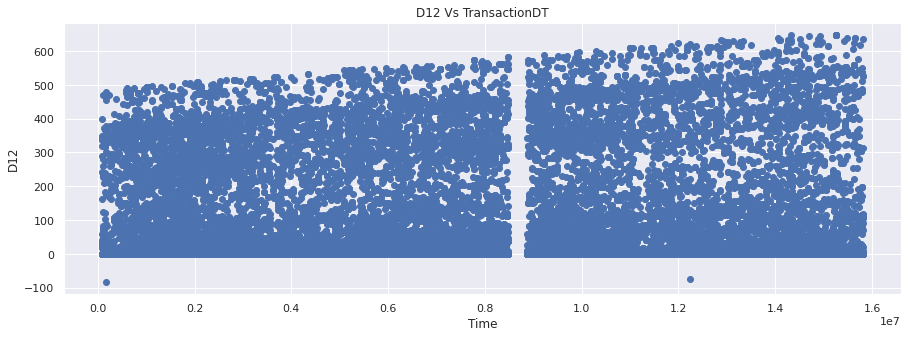

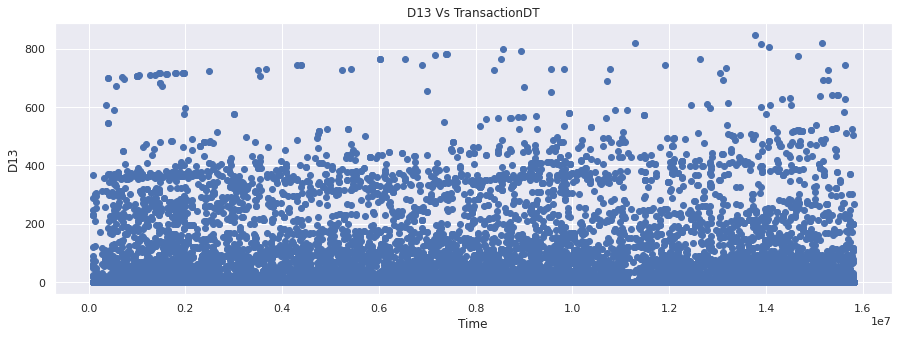

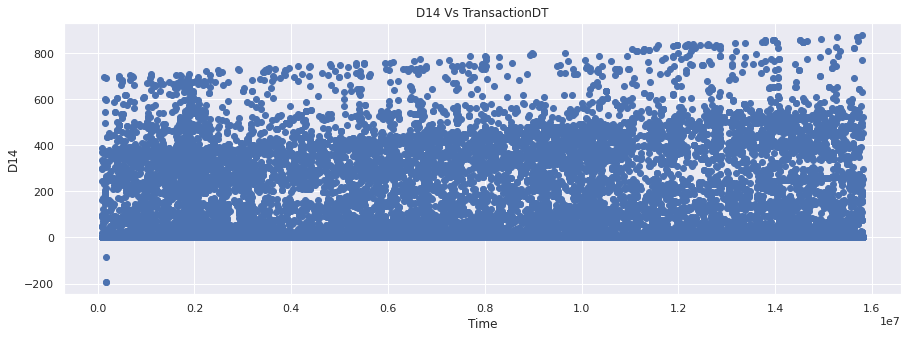

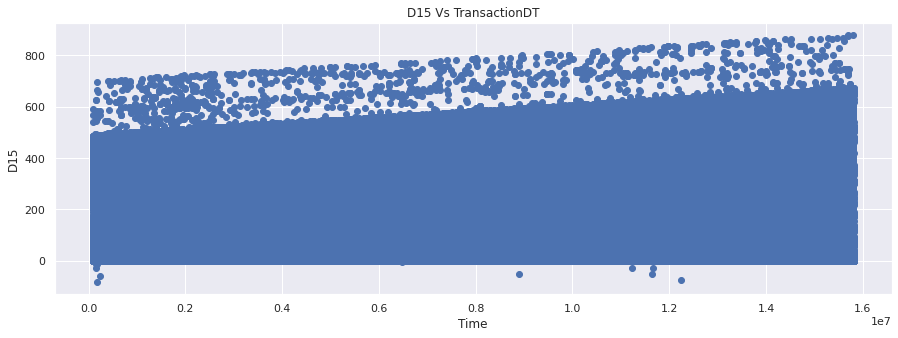

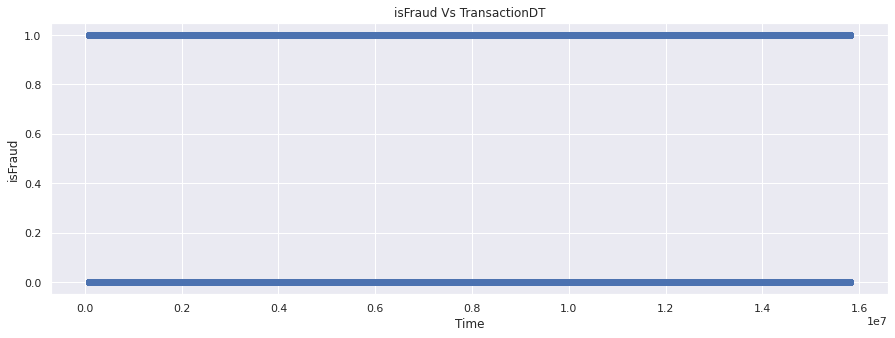

In [ ]:
for col in d_cols:
    plt.figure(figsize=(15,5))
    plt.scatter(df['TransactionDT'] ,df[col])
    plt.title(col + ' Vs TransactionDT')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()

## ProductCD

In [ ]:
train_transaction['ProductCD'].head()

0    W
1    W
2    W
3    W
4    H
Name: ProductCD, dtype: object

In [ ]:
train_transaction['ProductCD'].shape

(590540,)

In [ ]:
pd1 = ['ProductCD']
for i in pd1:
    print ("Unique ",i, " = ",train_transaction[i].nunique())

Unique  ProductCD  =  5


In [ ]:
train_transaction['ProductCD'].describe()

count     590540
unique         5
top            W
freq      439670
Name: ProductCD, dtype: object

In [ ]:
train_transaction[pd1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductCD  590540 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [ ]:
train_transaction['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [ ]:
# tính phần trăm mỗi loại
a = pd.DataFrame(train_transaction['ProductCD'].value_counts())
a['percent']= (a['ProductCD']/ a['ProductCD'].sum())*100

In [ ]:
a

,ProductCD,percent
W,439670,74.452196
C,68519,11.602770
R,37699,6.383818
H,33024,5.592170
S,11628,1.969045


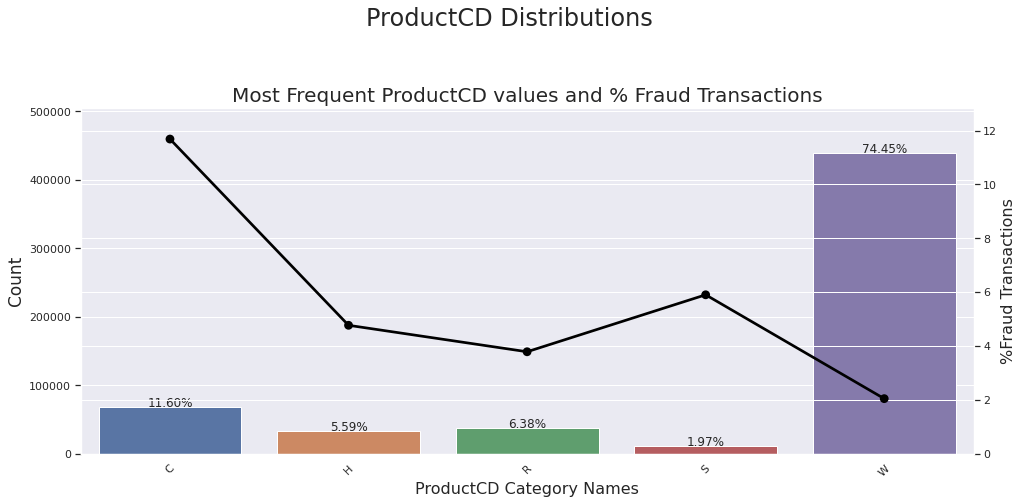

In [ ]:
ploting_cnt_amt(train_transaction, 'ProductCD')

In [ ]:
#ProductCD full data
missing_values_count = train_transaction['ProductCD'].isnull().sum()
missing_values_count

0

Text(0.5, 1.0, 'ProductCD isFraud=1')

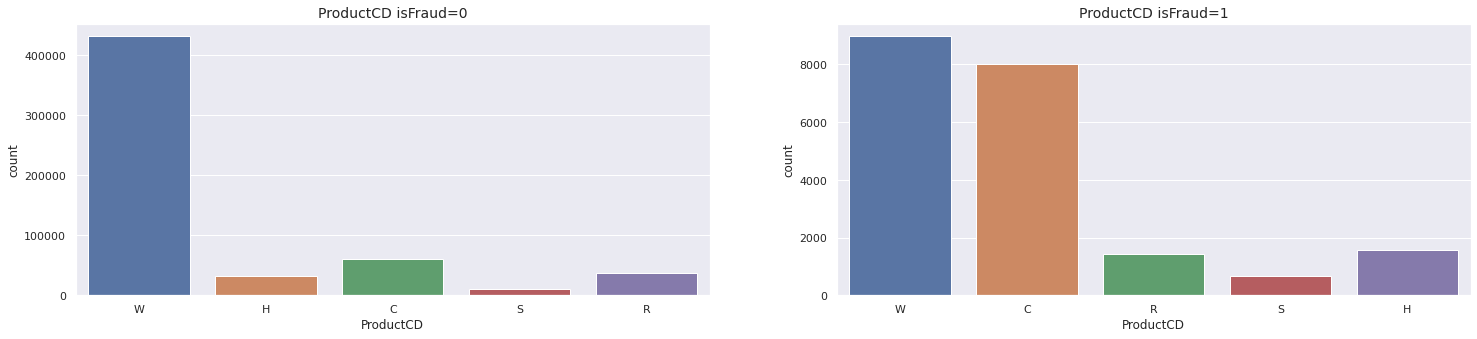

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="ProductCD", ax=ax[0], data=train_transaction.loc[train_transaction['isFraud'] == 0])
ax[0].set_title('ProductCD isFraud=0', fontsize=14)
sns.countplot(x="ProductCD", ax=ax[1], data=train_transaction.loc[train_transaction['isFraud'] == 1])
ax[1].set_title('ProductCD isFraud=1', fontsize=14)


W,C,H,R,S là mã sản phẩm, sản phẩm cho mỗi giao dịch

- Feature ProductCD: mã sản phẩm, sản phẩm cho mỗi giao dịch
- “Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”
- Feature này có tính năng phân loại
- Feature này có ít tác động tới model
- Không có giá trị Null
- Loại dữ liệu : object
- Nhìn vào biểu đồ ta thấy hai loại mã sản phẩm xuất hiện nhiều nhất là W và C


## TransactionDT

- TransactionDT : is a timedelta from a given reference datetime (not an actual timestamp).

- TransactionDT is one of the features that can cause problems.

- It seems as if there is a time difference between testing and train operations.

In [ ]:
df['TransactionDT'].head()

0    86400
1    86401
2    86469
3    86499
4    86506
Name: TransactionDT, dtype: int64

In [ ]:
df['TransactionDT'].shape

(590540,)

In [ ]:
round(df['TransactionDT']/(60*60*24),1)
# dữ liệu được tính trong vòng 183 ngày và đơn vị tính bằng giây

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
          ...  
590535    183.0
590536    183.0
590537    183.0
590538    183.0
590539    183.0
Name: TransactionDT, Length: 590540, dtype: float64

In [ ]:
df['TransactionDT'].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [ ]:
df['TransactionDT'].nunique()

573349

In [ ]:
df['TransactionDT'].value_counts()

9474817     8
11576951    5
4397066     5
7236588     5
1544629     4
           ..
4629634     1
4629631     1
4629557     1
4629466     1
15811131    1
Name: TransactionDT, Length: 573349, dtype: int64

In [ ]:
df['TransactionDT'].isnull().sum()

0

In [ ]:
pd2= df['TransactionDT']

In [ ]:
round(df['TransactionDT']/(60*60*24),1)
# dữ liệu được tính trong vòng 183 ngày và đơn vị tính bằng giây

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
          ...  
590535    183.0
590536    183.0
590537    183.0
590538    183.0
590539    183.0
Name: TransactionDT, Length: 590540, dtype: float64

In [ ]:
print(f"Train TransactionDT min : {df.TransactionDT.min()}")#Đây là ngày đầu tiên
print(f"Train TransactionDT max : {df.TransactionDT.max()}")#Đây là ngày cuối cùng

Train TransactionDT min : 86400
Train TransactionDT max : 15811131


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


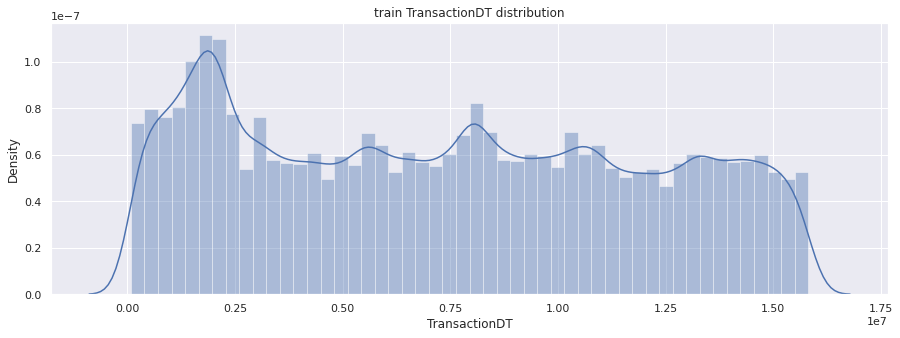

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(train_transaction["TransactionDT"])
plt.title('train TransactionDT distribution')
plt.show()

#III. TRAIN IDENTITY

In [ ]:
train_identity.head(n = 5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,0,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,0,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,1,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,1,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,1,MacOS


In [ ]:
train_identity.shape

(144233, 41)

In [ ]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
train_identity = train_identity.drop_duplicates()
train_identity.shape

(144233, 41)

In [ ]:
# categories fetures & num fetures 

a,b = phan_loai_fetures(train_identity)
print("Number of catofories fetures is: ",len(a)," by :", a )
print("Number of nummeric fetures is: ", len(b)," by : ", b )

Number of catofories fetures is:  16  by : ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceInfo']
Number of nummeric fetures is:  25  by :  ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32', 'DeviceType']


In [ ]:
train_identity[a]

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceInfo
0,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,SAMSUNG SM-G892A Build/NRD90M
1,NotFound,New,NotFound,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,T,F,F,T,iOS Device
2,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,F,F,T,T,Windows
3,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,F,F,T,T,NaN
4,NotFound,Found,Found,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,T,F,T,T,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,F,F,T,F,F3111 Build/33.3.A.1.97
144229,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,855x480,match_status:2,T,F,T,F,A574BL Build/NMF26F
144230,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,F,F,T,F,Moto E (4) Plus Build/NMA26.42-152
144231,NotFound,Found,Found,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,2560x1600,match_status:2,T,F,T,F,MacOS


In [ ]:
train_identity[a].describe()

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceInfo
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,118666
unique,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,1786
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,Windows
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,47722


In [ ]:
train_identity[b]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,DeviceType
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0,0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,32.0,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,0
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,32.0,0
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,0
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,24.0,1


In [ ]:
train_identity[b].describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,DeviceType
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000,144233.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597,0.614201
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502,0.486785
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000,0.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000,1.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000,1.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000,1.000000


In [ ]:
train_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType            0
DeviceInfo        25567
dtype: int64

In [ ]:
a = percent_null(train_identity)
a

,number_null,percent
TransactionID,0,0.00
id_01,0,0.00
id_02,3361,2.33
id_03,77909,54.02
id_04,77909,54.02
id_05,7368,5.11
id_06,7368,5.11
id_07,139078,96.43
id_08,139078,96.43
id_09,69307,48.05


In [ ]:
for i,j in zip(a['percent'],a.index):
  if i > 90:
    del train_identity[j]
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_09          74926 non-null   float64
 8   id_10          74926 non-null   float64
 9   id_11          140978 non-null  float64
 10  id_12          144233 non-null  object 
 11  id_13          127320 non-null  float64
 12  id_14          80044 non-null   float64
 13  id_15          140985 non-null  object 
 14  id_16          129340 non-null  object 
 15  id_17          139369 non-null  float64
 16  id_18          45113 non-null   float64
 17  id_19          139318 non-nul

In [ ]:
#  tìm hiểu từn cột id còn lại 
# id 31
print("Tổng số giá trị unique là: ",len(train_identity['id_31'].unique()))
train_identity['id_31'].unique()

Tổng số giá trị unique là:  131


array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [ ]:
train_identity['id_31'].fillna('unknown')

0             samsung browser 6.2
1              mobile safari 11.0
2                     chrome 62.0
3                     chrome 62.0
4                     chrome 62.0
                   ...           
144228    chrome 66.0 for android
144229    chrome 55.0 for android
144230    chrome 65.0 for android
144231                chrome 66.0
144232    chrome 66.0 for android
Name: id_31, Length: 144233, dtype: object

In [ ]:
#id_31 = pd.DataFrame(train_identity['id_31'].value_counts())
#id['percent'] = (id_31['id_31'] / len(train_identity.id_31)) *100
#id_31


In [ ]:
train_identity['id_31'][train_identity['id_31'].str.contains('chrome', na=False)].unique()

array(['chrome 62.0', 'chrome 62.0 for android', 'chrome 49.0',
       'chrome 61.0', 'chrome 56.0 for android',
       'chrome 54.0 for android', 'chrome', 'chrome 62.0 for ios',
       'chrome 60.0 for android', 'chrome 61.0 for android',
       'chrome generic', 'chrome 59.0 for android', 'chrome 55.0',
       'chrome 55.0 for android', 'chrome 57.0 for android',
       'chrome 56.0', 'chrome 46.0 for android', 'chrome 58.0',
       'chrome 59.0', 'chrome 53.0 for android',
       'chrome 58.0 for android', 'chrome 60.0',
       'chrome 50.0 for android', 'chrome 51.0 for android',
       'chrome 63.0', 'chrome 52.0 for android', 'chrome 51.0',
       'chrome generic for android', 'chrome 57.0',
       'chrome 63.0 for android', 'chrome 43.0 for android',
       'chrome 63.0 for ios', 'chrome 49.0 for android',
       'chrome 64.0 for android', 'chrome 64.0', 'chrome 64.0 for ios',
       'chrome 65.0', 'chrome 65.0 for android', 'chrome 65.0 for ios',
       'chrome 66.0', 'chrome 

## Device Type

In [ ]:
train_identity['DeviceType'].head()

0     mobile
1     mobile
2    desktop
3    desktop
4    desktop
Name: DeviceType, dtype: object

In [ ]:
device = [ 'DeviceType']

In [ ]:
train_identity[device].describe() 

,DeviceType
count,140810
unique,2
top,desktop
freq,85165


In [ ]:
train_identity['DeviceType'].nunique()

2

In [ ]:
train_identity['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [ ]:
train_identity[device].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   DeviceType  140810 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
train_identity['DeviceType'].isnull().sum()

3423

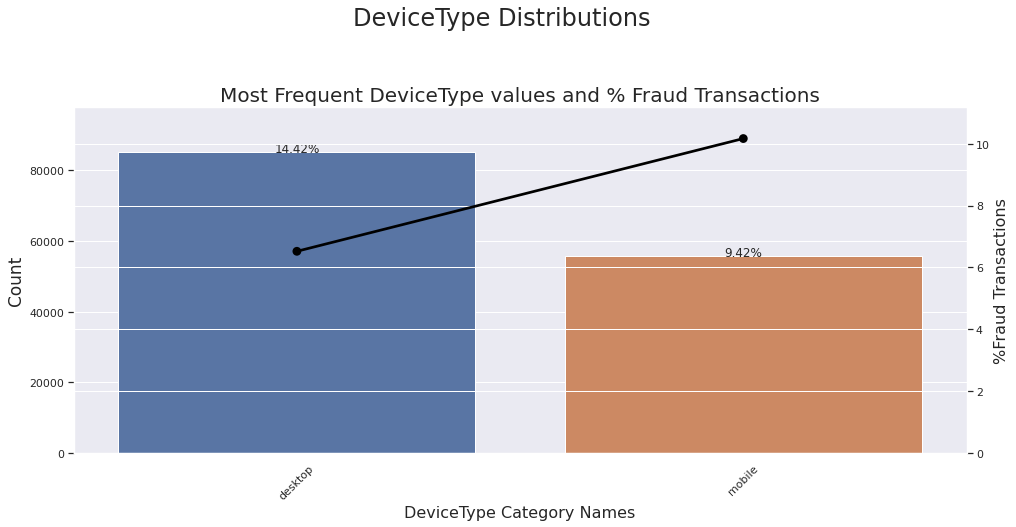

In [ ]:
ploting_cnt_amt(df, 'DeviceType')

In [ ]:
#fill NaN bằng unknown
train_identity['DeviceType'] = train_identity['DeviceType'].replace('unknown', np.nan)
train_identity['DeviceType']=train_identity['DeviceType'].fillna(train_identity['DeviceType'].mode().iloc[0])
train_identity['DeviceType']

0          mobile
1          mobile
2         desktop
3         desktop
4         desktop
           ...   
144228     mobile
144229     mobile
144230     mobile
144231    desktop
144232     mobile
Name: DeviceType, Length: 144233, dtype: object

In [ ]:
#Encoding thay desktop = 1 và moblie = 0
train_identity['DeviceType'] = train_identity['DeviceType'].replace({'mobile': 0 , 'desktop': 1})
train_identity['DeviceType']

0         0
1         0
2         1
3         1
4         1
         ..
144228    0
144229    0
144230    0
144231    1
144232    0
Name: DeviceType, Length: 144233, dtype: int64

## DeviceInfo

In [ ]:
train_identity['DeviceInfo'].head()

0    SAMSUNG SM-G892A Build/NRD90M
1                       iOS Device
2                          Windows
3                              NaN
4                            MacOS
Name: DeviceInfo, dtype: object

In [ ]:
train_identity['DeviceInfo'].shape

(144233,)

In [ ]:
train_identity['DeviceInfo'].describe()

count      118666
unique       1786
top       Windows
freq        47722
Name: DeviceInfo, dtype: object

In [ ]:
train_identity['DeviceInfo'].nunique()

1786

In [ ]:
dv2= [ 'DeviceInfo']

In [ ]:
train_identity[dv2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   DeviceInfo  118666 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
train_identity['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

In [ ]:
train_identity['DeviceInfo'].isnull().sum()

25567

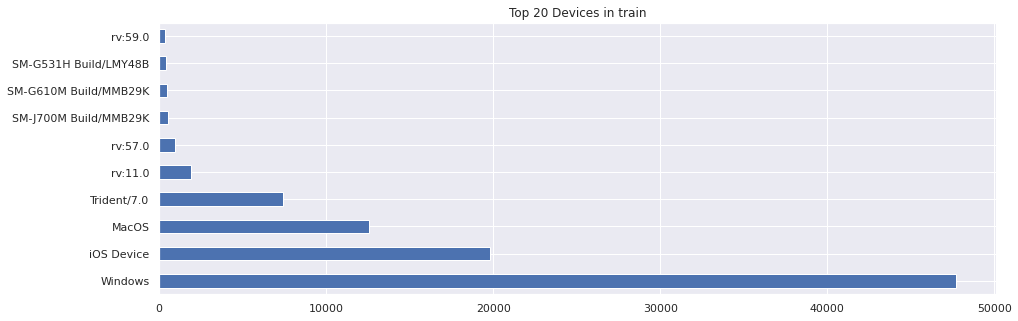

In [ ]:
df['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in train')
plt.show()

In [ ]:
two_train = pd.concat([df], ignore_index=True)

In [ ]:
two_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
two_train['DeviceInfo'] = two_train['DeviceInfo'].fillna('unknown_device').str.lower()
two_train['DeviceName'] = two_train['DeviceInfo'].str.split('/', expand=True)[0]

two_train.loc[two_train['DeviceName'].str.contains('SM', na=False), 'DeviceName'] = 'samsung'
two_train.loc[two_train['DeviceName'].str.contains('SAMSUNG', na=False), 'DeviceName'] = 'samsung'
two_train.loc[two_train['DeviceName'].str.contains('GT-', na=False), 'DeviceName'] = 'samsung'
two_train.loc[two_train['DeviceName'].str.contains('Moto G', na=False), 'DeviceName'] = 'motorola'
two_train.loc[two_train['DeviceName'].str.contains('Moto', na=False), 'DeviceName'] = 'motorola'
two_train.loc[two_train['DeviceName'].str.contains('moto', na=False), 'DeviceName'] = 'motorola'
two_train.loc[two_train['DeviceName'].str.contains('LG-', na=False), 'DeviceName'] = 'lg'
two_train.loc[two_train['DeviceName'].str.contains('rv:', na=False), 'DeviceName'] = 'rv'
two_train.loc[two_train['DeviceName'].str.contains('HUAWEI', na=False), 'DeviceName'] = 'huawei'
two_train.loc[two_train['DeviceName'].str.contains('ALE-', na=False), 'DeviceName'] = 'huawei'
two_train.loc[two_train['DeviceName'].str.contains('-L', na=False), 'DeviceName'] = 'huawei'
two_train.loc[two_train['DeviceName'].str.contains('Blade', na=False), 'DeviceName'] = 'zte'
two_train.loc[two_train['DeviceName'].str.contains('BLADE', na=False), 'DeviceName'] = 'zte'
two_train.loc[two_train['DeviceName'].str.contains('Linux', na=False), 'DeviceName'] = 'linux'
two_train.loc[two_train['DeviceName'].str.contains('XT', na=False), 'DeviceName'] = 'sony'
two_train.loc[two_train['DeviceName'].str.contains('HTC', na=False), 'DeviceName'] = 'htv'
two_train.loc[two_train['DeviceName'].str.contains('ASUS', na=False), 'DeviceName'] = 'asus'

two_train.loc[two_train['DeviceName'].isin(two_train['DeviceName'].value_counts()[two_train['DeviceName'].value_counts() < 1000].index), 'DeviceName'] = "Others"

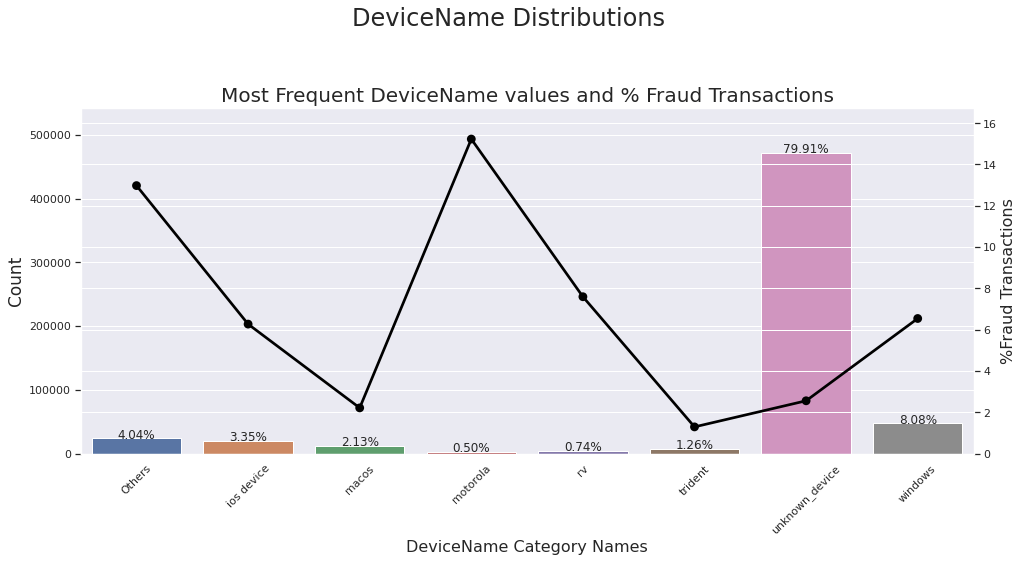

In [ ]:
ploting_cnt_amt(two_train, 'DeviceName')

In [ ]:

two_train['DeviceName'] = two_train['DeviceName'].replace({'unknown_device':0,'windows': 1, 'ios device': 2,'macos': 3, 'Others':4, 'trident' :5, 'rv':6, 'motorola': 7})
two_train['DeviceName']


0         0
1         0
2         0
3         0
4         4
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: DeviceName, Length: 590540, dtype: int64

##ID1-ID38

In [ ]:
column_i = [col for col in train_identity.columns if 'id' in col]
train_identity[column_i].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T


In [ ]:
train_identity[column_i].shape

(144233, 38)

In [ ]:
train_identity[column_i].describe()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
train_identity[column_i].nunique()

id_01        77
id_02    115655
id_03        24
id_04        15
id_05        93
id_06       101
id_07        84
id_08        94
id_09        46
id_10        62
id_11       365
id_12         2
id_13        54
id_14        25
id_15         3
id_16         2
id_17       104
id_18        18
id_19       522
id_20       394
id_21       490
id_22        25
id_23         3
id_24        12
id_25       341
id_26        95
id_27         2
id_28         2
id_29         2
id_30        75
id_31       130
id_32         4
id_33       260
id_34         4
id_35         2
id_36         2
id_37         2
id_38         2
dtype: int64

In [ ]:
for i in range(1, 10):
    print(train_identity['id_0' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')
    
for i in range(10, 39):
    print(train_identity['id_' + str(i)].value_counts(dropna=False, normalize=True).head())
    print('\n')

-5.0     0.569703
 0.0     0.135579
-10.0    0.078047
-20.0    0.077728
-15.0    0.039339
Name: id_01, dtype: float64


NaN       0.023303
1102.0    0.000076
696.0     0.000069
1120.0    0.000062
1083.0    0.000062
Name: id_02, dtype: float64


NaN    0.540161
0.0    0.443054
1.0    0.005983
3.0    0.004631
2.0    0.002919
Name: id_03, dtype: float64


 NaN    0.540161
 0.0    0.455783
-5.0    0.000915
-6.0    0.000679
-8.0    0.000444
Name: id_04, dtype: float64


0.0    0.643008
1.0    0.057497
NaN    0.051084
2.0    0.034229
3.0    0.026721
Name: id_05, dtype: float64


 0.0    0.633177
 NaN    0.051084
-1.0    0.032496
-5.0    0.026686
-6.0    0.022582
Name: id_06, dtype: float64


NaN     0.964259
0.0     0.002836
16.0    0.001699
14.0    0.001581
12.0    0.001442
Name: id_07, dtype: float64


 NaN      0.964259
-100.0    0.003467
 0.0      0.001810
-34.0     0.001782
-33.0     0.001449
Name: id_08, dtype: float64


0.0    0.487947
NaN    0.480521
1.0    0.011204
3.0    0.006697
2

In [ ]:
train_identity[column_i].isnull().sum()

id_01         0
id_02      3361
id_03     77909
id_04     77909
id_05      7368
id_06      7368
id_07    139078
id_08    139078
id_09     69307
id_10     69307
id_11      3255
id_12         0
id_13     16913
id_14     64189
id_15      3248
id_16     14893
id_17      4864
id_18     99120
id_19      4915
id_20      4972
id_21    139074
id_22    139064
id_23    139064
id_24    139486
id_25    139101
id_26    139070
id_27    139064
id_28      3255
id_29      3255
id_30     66668
id_31      3951
id_32     66647
id_33     70944
id_34     66428
id_35      3248
id_36      3248
id_37      3248
id_38      3248
dtype: int64

In [ ]:
a22 = percent_null(train_identity[column_i])
a22

,percent
id_01,0.000000
id_02,2.330257
id_03,54.016071
id_04,54.016071
id_05,5.108401
id_06,5.108401
id_07,96.425922
id_08,96.425922
id_09,48.052110
id_10,48.052110


#IV. DATA DESCRIPTIVES


In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
df.shape

(590540, 434)

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
cat, num = phan_loai_fetures(df)
print("Number of category features:", len(cat))
print("Number of nummeric features:",len(num))

Number of category features: 31
Number of nummeric features: 403


In [ ]:
# Analysis object catorical
# Category features have the number of missing value more than 0
Percent_cat = percent_null(df[cat])
Percent_cat[Percent_cat['percent'] > 0]


,number_null,percent
card4,1577,0.27
card6,1571,0.27
P_emaildomain,94456,15.99
R_emaildomain,453249,76.75
M1,271100,45.91
M2,271100,45.91
M3,271100,45.91
M4,281444,47.66
M5,350482,59.35
M6,169360,28.68


In [ ]:
# Analysis numer features
# Nummeric features have the number of missing value more than 0 
Percent_num = percent_null(df[num])
Percent_num[Percent_num['percent'] > 0]

,number_null,percent
card2,8933,1.51
card3,1565,0.27
card5,4259,0.72
addr1,65706,11.13
addr2,65706,11.13
...,...,...
id_22,585371,99.12
id_24,585793,99.20
id_25,585408,99.13
id_26,585377,99.13


In [ ]:
rate_umbalance = train_transaction['isFraud'].value_counts()
rate_umbalance = pd.DataFrame(rate_umbalance)
rate_umbalance['Rate'] = (rate_umbalance['isFraud']/ rate_umbalance['isFraud'].sum()) *100
rate_umbalance 
#  phải xử lí umbalance

,isFraud,Rate
0,569877,96.500999
1,20663,3.499001
